# Installing and importing all the required python libraries and modules

In [ ]:
# !pip install numpy --break-system-packages
# !pip install pandas --break-system-packages
# !pip install matplotlib --break-system-packages
# !pip install seaborn --break-system-packages
# !pip install sklearn --break-system-packages
# !pip install imblearn --break-system-packages
# !pip install lazypredict --break-system-packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle as pkl
import os

from lazypredict.Supervised import LazyClassifier

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, auc
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import Lasso
from category_encoders.binary import BinaryEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb

# i. Data Collection and Loading

In [111]:
df = pd.read_csv('mentalhealthsurvey_Report21_06.csv')
df

Consent What country are you from? What is your ethnic group?  \
0    Agreed          The United States                      White   
1    Agreed                    Nigeria                      Black   
2    Agreed                      India                      Asian   
3    Agreed                         US                      White   
4    Agreed                    nigeria                      Black   
..      ...                        ...                        ...   
218  Agreed                    england                      Black   
219  Agreed             Czech Republic                      White   
220  Agreed                    Germany                      White   
221  Agreed                    England                      Black   
222  Agreed                         uk                      White   

    What is your biological gender? What is your year of birth?  \
0                            Female                        1998   
1                              Male                        1992   
2                              Male                        1999   
3                              Male                        2000   
4                            Female                       <1990   
..                              ...                         ...   
218                            Male                       <1990   
219                          Female                        1999   
220                            Male                       <1990   
221                            Male                       <1990   
222                            Male                        1994   

    In which country is the institution where you are studying located?  \
0                                         The European                    
1                          United Kingdom, Southampton                    
2                                                India                    
3                                                   US                    
4                                                   uk                    
..                                                 ...                    
218                                            england                    
219                                     United Kingdom                    
220                                            Germany                    
221                                            England                    
222                                                 uk                    

    Are you a home student or an international student?  \
0                                     European student    
1                                         Home student    
2                                International student    
3                                         Home student    
4                                International student    
..                                                 ...    
218                                       Home student    
219                                   European student    
220                                       Home student    
221                                       Home student    
222                                       Home student    

    Are you full-time or part-time student?  \
0                 I am a full-time student.   
1                 I am a full-time student.   
2                 I am a full-time student.   
3                 I am a full-time student.   
4                 I am a full-time student.   
..                                      ...   
218               I am a full-time student.   
219               I am a full-time student.   
220               I am a full-time student.   
221               I am a full-time student.   
222               I am a full-time student.   

                        What is your course of study?  \
0         Bachelor of Science in Software Engineering   
1                                                 Msc   
2                       

# ii. Data Cleaning

In [112]:
# changing the column headers
column_rename_all = {
'What are the approximate costs for your studies? (tuition fee per year of study, in pound £)' : 'cost_of_study',
'What country are you from?' : 'home_country',
'What is your ethnic group?' : 'ethnic_group',
'How many hours do you spend on university related work per week during exams?' : 'hours_per_week_university_work',
'What is your course of study?' : 'course_of_study',
'How would you define your alcohol consumption?' : 'alcohol_consumption',
'Do you have any known disabilities?' : 'known_disabilities',
'Would you consider yourself an intro- or extrovert person? (Definitions from Oxford Languages)' : 'personality_type',
'In which country is the institution where you are studying located?' : 'institution_country',
'What is your year of birth?' : 'year_of_birth',
'Would you say that you are normally well hydrated?' : 'well_hydrated',
    'How many hours per day do you spend on a desktop device?': 'hours_desktop',
    'How many hours per day do you spend on a laptop?': 'hours_laptop',
    'How many hours per day do you spend on a smartphone?': 'hours_smartphone',
    'How many hours per day do you spend on other device(s)?': 'hours_other',
    'How many hours per day you spend on Facebook?': 'social_facebook',
    'How many hours per day spend on Instagram?': 'social_instagram',
    'How many hours per day do you spend on Snapchat?': 'social_snapchat',
    'How many hours per day do you spend on TikTok?': 'social_tiktok',
    'How many hours per day do you spend on Twitter?': 'social_twitter',
    'How many hours per day do you spend on other platform(s)?': 'social_other_hours',
    'What kind of (above not listed) social media platform do you use?': 'social_other',
'Would you describe your current diet as healthy and balanced?' : 'diet',
'What year of study are you currently in?' : 'year_of_study',
'How often do you exercise per week?' : 'exercise_per_week',
'How would you define your quality of life? (as defined below by the World Health Organization 2012)' : 'quality_of_life',
'Do you feel that the university stresses you out in general? (multiple choice)' : 'stress_in_general',
'How many hours per week do you work?' : 'work_hours_per_week',
'Are you a home student or an international student?' : 'student_type_location',
    'Would you say that you have mental health issues?': 'mental_health_issues_personal_declaration',
'How would you rate your family class? (Family earnings per year)':'family_earning_class',
'Do you feel stressed before exams? (multiple choice)':'stress_before_exams',
    'Do you prefer your timetable to be spread or compact so that you have less stress at university? (e.g. 1-2 busy days or 3-4 days with less lectures)':'timetable_preference',
'Do you feel like your timetabling structure has any impact on your study, life and health?': 'ts_impact_Grouped'
}

In [113]:
df = df.loc[:, column_rename_all.keys()].rename(columns=column_rename_all)

# iii. Feature Engineering

In [119]:
#correcting name of home_country
nig_name = ['Nigeria','Nig.','Oyo state','nigeria','Nigérian','osun state','NIGERIA','Nigerian']
ind_name = ['India','Indian']
uk_name = ['United kingdom','england','U','UK','The UK','Britain','london','Wales','Uk','uk','United Kingdom','England']
ger_name =['Germany','Deutschland','germany']
usa_name =['US','The United States','us','United state']

for value in nig_name:
        df.replace({'home_country': {value: 'Nigeria'}}, inplace=True)
for value in ind_name:
        df.replace({'home_country': {value: 'India'}}, inplace=True)
for value in uk_name:
        df.replace({'home_country': {value: 'United Kingdom'}}, inplace=True)
for value in ger_name:
        df.replace({'home_country': {value: 'Germany'}}, inplace=True)
for value in usa_name:
        df.replace({'home_country': {value: 'United States of America'}}, inplace=True)


In [120]:
#correcting institutional country
#correcting name of home_country
nig_name = ['Offa Nigeria','kwara state','Nigeria','Nig.','Oyo state','Offa','Kwara state','gd','Federal polytechnic Offa','nigeria','Nigérian','osun state','NIGERIA','Nigerian','Offa kwara state','Federal polytechnic Offa']
ind_name = ['India','Indian','India']
uk_name = ['United kindgom','united kingdom','London','The Uk','southampton','United kingdom','United KIngdom','wqe','United Kingdom, Southampton','UNITED KINGDOM','england','U','UK','The UK','Britain','london','Wales','Uk','uk','United Kingdom','England']
ger_name =['Germany','Deutschland','germany','Hochschule Ansbach','Bonn']
usa_name =['United State','US','The United States','us','United state']

for value in nig_name:
        df.replace({'institution_country': {value: 'Nigeria'}}, inplace=True)
for value in ind_name:
        df.replace({'institution_country': {value: 'India'}}, inplace=True)
for value in uk_name:
        df.replace({'institution_country': {value: 'United Kingdom'}}, inplace=True)
for value in ger_name:
        df.replace({'institution_country': {value: 'Germany'}}, inplace=True)
for value in usa_name:
        df.replace({'institution_country': {value: 'United States of America'}}, inplace=True)

In [121]:
#renaming the stress_before_exams 
value_yes = ['Yes (due to university work)',
             'Yes (due to university work), Yes (due to other circumstances such as health, family issues, etc.)',
             'Yes (due to university work), Yes (due to employment related issues)',
             'Yes (due to employment related issues)',
             'Yes (due to other circumstances such as health, family issues, etc.)',
             'Yes (due to university work), Yes (due to employment related issues), Yes (due to other circumstances such as health, family issues, etc.)',
             'Yes (combination of two or more of the above)',
             'Yes (due to employment related issues), Yes (due to other circumstances such as health, family issues, etc.)',
             'Yes (due to university work), Yes (due to employment related issues), Yes (due to other circumstances such as health, family issues, etc.), Yes (combination of two or more of the above)',
             'Yes (due to university work), Yes (due to employment related issues), Yes (combination of two or more of the above)',
             'Yes (due to university work), Yes (due to other circumstances such as health, family issues, etc.), Yes (combination of two or more of the above)',
             'Yes (due to university work), No'
                         ]
for value in value_yes:
        df.replace({'stress_before_exams': {value: 'Yes'}}, inplace=True)

In [122]:
# changing the stress in general
for value in value_yes:
        df.replace({'stress_in_general': {value: 'Yes'}}, inplace=True)

In [123]:
# chaning alcohol_consumption
df.alcohol_consumption = df.alcohol_consumption.replace(["I don't drink alcohol."],'No Drinks')
df.alcohol_consumption = df.alcohol_consumption.replace(["My alcohol consumption is below moderate."],'Below Moderate')
df.alcohol_consumption = df.alcohol_consumption.replace(["My alcohol consumption is above moderate."],'Above Moderate')
df.alcohol_consumption = df.alcohol_consumption.replace(["My alcohol consumption is moderate."],'Moderate')
df.alcohol_consumption = df.alcohol_consumption.replace(["My alcohol consumption less moderate."],'Less Moderate')

In [124]:
#chaning diet
df.diet = df.diet.replace(['Yes, I think my diet is healthy.'],'Healthy')
df.diet = df.diet.replace(['I think my diet is somewhat inbetween.'],'Somewhat Inbetween')
df.diet = df.diet.replace(['No, I think my diet is unhealthy.'],'Unhealthy')

In [125]:
# chaning quality_of_life
df.quality_of_life = df.quality_of_life.replace(['Medium quality of life.'],'Medium')
df.quality_of_life = df.quality_of_life.replace(['High quality of life.'],'High')
df.quality_of_life = df.quality_of_life.replace(['Very high quality of life'],'Very High')
df.quality_of_life = df.quality_of_life.replace(['Low quality of life.'],'Low')
df.quality_of_life = df.quality_of_life.replace(['Very low quality of life.'],'Very Low')

In [126]:
#chaning personality_type
df.personality_type = df.personality_type.replace(['Introvert (a quiet person who is more interested in their own thoughts and feelings than in spending time with other people)'],'Introvert')
df.personality_type = df.personality_type.replace(['Extrovert (​a lively and confident person who enjoys being with other people)'],'Extrovert')

In [127]:
# creating a list of social media and devices
social_list = ['social_facebook','social_instagram','social_snapchat','social_tiktok','social_twitter','social_other_hours']
devices_list = ['hours_desktop','hours_laptop','hours_smartphone','hours_other']

# combing the hours of social media
df['total_social_media_hours'] = df[social_list].sum(axis=1).astype(np.int64)

# combining the hours of device usage
df['total_device_hours'] = df[devices_list].sum(axis=1).astype(np.int64)


In [128]:

# dropping social list, devices list ,devices, social_platform 
df.drop(['social_facebook','social_instagram','social_snapchat','social_tiktok','social_twitter','social_other_hours','hours_desktop','hours_laptop','hours_smartphone','hours_other','social_other'],axis=1,inplace=True)

In [129]:
def get_age(data):
    if '<' in data:
        age = 2022-int(data.split('<')[1])
        return age
    elif '>' in data:
        age = 2022-int(data.split('>')[1])
        return age
    else:
        age = 2022-int(data)
        return age
        
df['year_of_birth'] = df['year_of_birth'].apply(get_age)

In [130]:
def get_family_earning(data):
    if data=='Middle class (£25,000-£54,999)':
        return 'Middle class'
    elif data=='Lower class (below £25,000)':
        return 'Lower class'
    elif data=='Higher class (£55,000-£90,000)' or data=='Upper higher class (above £90,000)':
        return 'Higher class'

df['family_earning_class'] = df['family_earning_class'].apply(get_family_earning)

In [131]:
def change_timetable_preference(data):
    if data =='I prefer my timetable to be compact. (Having all my classes in one day or two days in the week.)':
        return 'I prefer my timetable to be compact. (having all my classes in one day or two days in the week)'
    elif data =='I prefer my timetable to be spread with long gaps in between classes. (For instance: 1-2 modules per day, spread over 3 times per week.)':
        return 'I prefer my timetable to be spread with long gaps in between classes (eg, 1-2 modules per day, spread over 3 times per week)'
df['timetable_preference']=df['timetable_preference'].apply(change_timetable_preference)

In [132]:
df.drop(columns=['institution_country'],inplace=True)

In [ ]:
def change_ts_impact(data):
    if data=='No, it has no impact on my study nor life or health.':
        return 'No, it has no impact on my studies, life or health'
    if data =='Yes, on my life, health and studies.'or data=='Yes, on my life and health.':
        return 'Yes, on my life, health and studies'
    if data=='Yes, on my studies.':
        return 'Yes, on my studies'
    else:
        return 'Yes, on my life, health and studies'
df['ts_impact_Grouped'] = df['ts_impact_Grouped'].apply(change_ts_impact) 

# iv. Data Exploration and Statistical Analysis

In [133]:
df.head(10)

cost_of_study              home_country ethnic_group  \
0          25000  United States of America        White   
1          25000                   Nigeria        Black   
2          25000                     India        Asian   
3          25000  United States of America        White   
4          25000                   Nigeria        Black   
5          25000                     India        Asian   
6          25000                     India        Asian   
7          25000                   Nigeria        Black   
8          25000                     India        Asian   
9          25000            United Kingdom        White   

   hours_per_week_university_work  \
0                              32   
1                              10   
2                              25   
3                              25   
4                              11   
5                              35   
6                              40   
7                              25   
8                              40   
9                              34   

                                course_of_study alcohol_consumption  \
0   Bachelor of Science in Software Engineering      Below Moderate   
1                                           Msc           No Drinks   
2                                           BCA           No Drinks   
3                                      History.      Below Moderate   
4                           AI and Data science           No Drinks   
5                              Computer science           No Drinks   
6                    AppliedAI and Data Science           No Drinks   
7  MSC Artificial Intelligence and Data Science           No Drinks   
8               Msc applied AI and data science           No Drinks   
9                                           art            Moderate   

  known_disabilities     personality_type  year_of_birth well_hydrated  ...  \
0                 No            Extrovert             24           Yes  ...   
1                Yes  Somewhat in-between             30           Yes  ...   
2                 No            Introvert             23           Yes  ...   
3                 No            Extrovert             22           Yes  ...   
4                 No            Introvert             32            No  ...   
5                 No  Somewhat in-between             22            No  ...   
6                 No  Somewhat in-between             32           Yes  ...   
7                 No  Somewhat in-between             28           Yes  ...   
8                 No  Somewhat in-between             30           Yes  ...   
9                 No            Extrovert             22           Yes  ...   

  stress_in_general work_hours_per_week  student_type_location  \
0               Yes               37.00       European student   
1               Yes               40.00           Home student   
2                No               20.00  International student   
3                No               30.00           Home student   
4               Yes               20.00  International student   
5               Yes               32.00  International student   
6                No               16.00  International student   
7               Yes               20.00  International student   
8                No               15.00  International student   
9               Yes               20.00       European student   

  mental_health_issues_personal_declaration family_earning_class  \
0                                       Yes         Middle class   
1                                        No         Middle class   
2                                        No          Lower class   
3                                        No         Higher class   
4                                        No          Lower class   
5                                        No         Middle class   
6                                        No         Middle class   
7                     

In [134]:
def Correlation_Heat_Map(df,figsize=(15,10)):
    '''Function that plots a correlation heat map'''
    print("Correlation Heat Map")
    plt.figure(figsize=figsize)
    sns.heatmap(df.corr(),annot=True)
    plt.show()
    print()

def Dist_plots(df,label_col_name):
    '''Function that plots the distribution of the features'''
    print("Distribution plots of the features")
    categorical_cols = df.select_dtypes(include=[object]).columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(numerical_cols):
        plt.subplot(8, 6, i+1)
        sns.distplot(df[col],label=col)
        plt.legend()
    plt.show()

def descriptive_statistics(dataframe, label_name):
    '''Function to compute descriptive statistics by group'''
    print("Descriptive statistics by target label")
    grouped_stats = dataframe.groupby(label_name).describe().transpose()
    print(grouped_stats)
    print()

def Plot_Skewness(dataframe):
    '''Function to plot the skewness of each feature'''
    print("Skewness of each feature")
    categorical_cols = dataframe.select_dtypes(include=[object]).columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns
    DF_Results = pd.DataFrame(columns=['Feature','Skewness'])
    for i, col in enumerate(numerical_cols):
        skewness = dataframe[col].skew()
        DF_Results.loc[i] = [col,skewness]
    print()
    return DF_Results

def Plot_Kurtosis(dataframe):
    '''Function to plot the kurtosis of each feature'''
    print("Kurtosis of each feature")
    categorical_cols = dataframe.select_dtypes(include=[object]).columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(numerical_cols):
        plt.subplot(8, 6, i+1)
        sns.distplot(dataframe[col],label=col)
        plt.legend()
    plt.show()

def Box_Plot_Outliers(dataframe):
    '''Function to plot the outliers of each feature'''
    print("Outliers of each feature")
    categorical_cols = dataframe.select_dtypes(include=[object]).columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(numerical_cols):
        plt.subplot(8, 6, i+1)
        sns.boxplot(dataframe[col])
        plt.xlabel(col)
    plt.show()

def Violin_plot(dataframe):
    '''Function to plot the violin plot of each feature'''
    print("Violin plot of each feature")
    categorical_cols = dataframe.select_dtypes(include=[object]).columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(numerical_cols):
        plt.subplot(8, 6, i+1)
        sns.violinplot(dataframe[col],label=col)
        plt.xlabel(col)
    plt.show()

def KDE_Plot(dataframe):
    '''Function to plot the KDE plot of each '''
    categorical_cols = dataframe.select_dtypes(include=[object]).columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(numerical_cols):
        plt.subplot(8, 6, i+1)
        sns.kdeplot(dataframe[col],label=col)
    plt.show()

def Plot_Pie_Chart(df,label):
    '''This function plots the pie chart of value counts of a given col '''
    print('Pie Chart')
    plt.figure(figsize=(5,5))
    df[label].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.show()
    print()

Correlation Heat Map


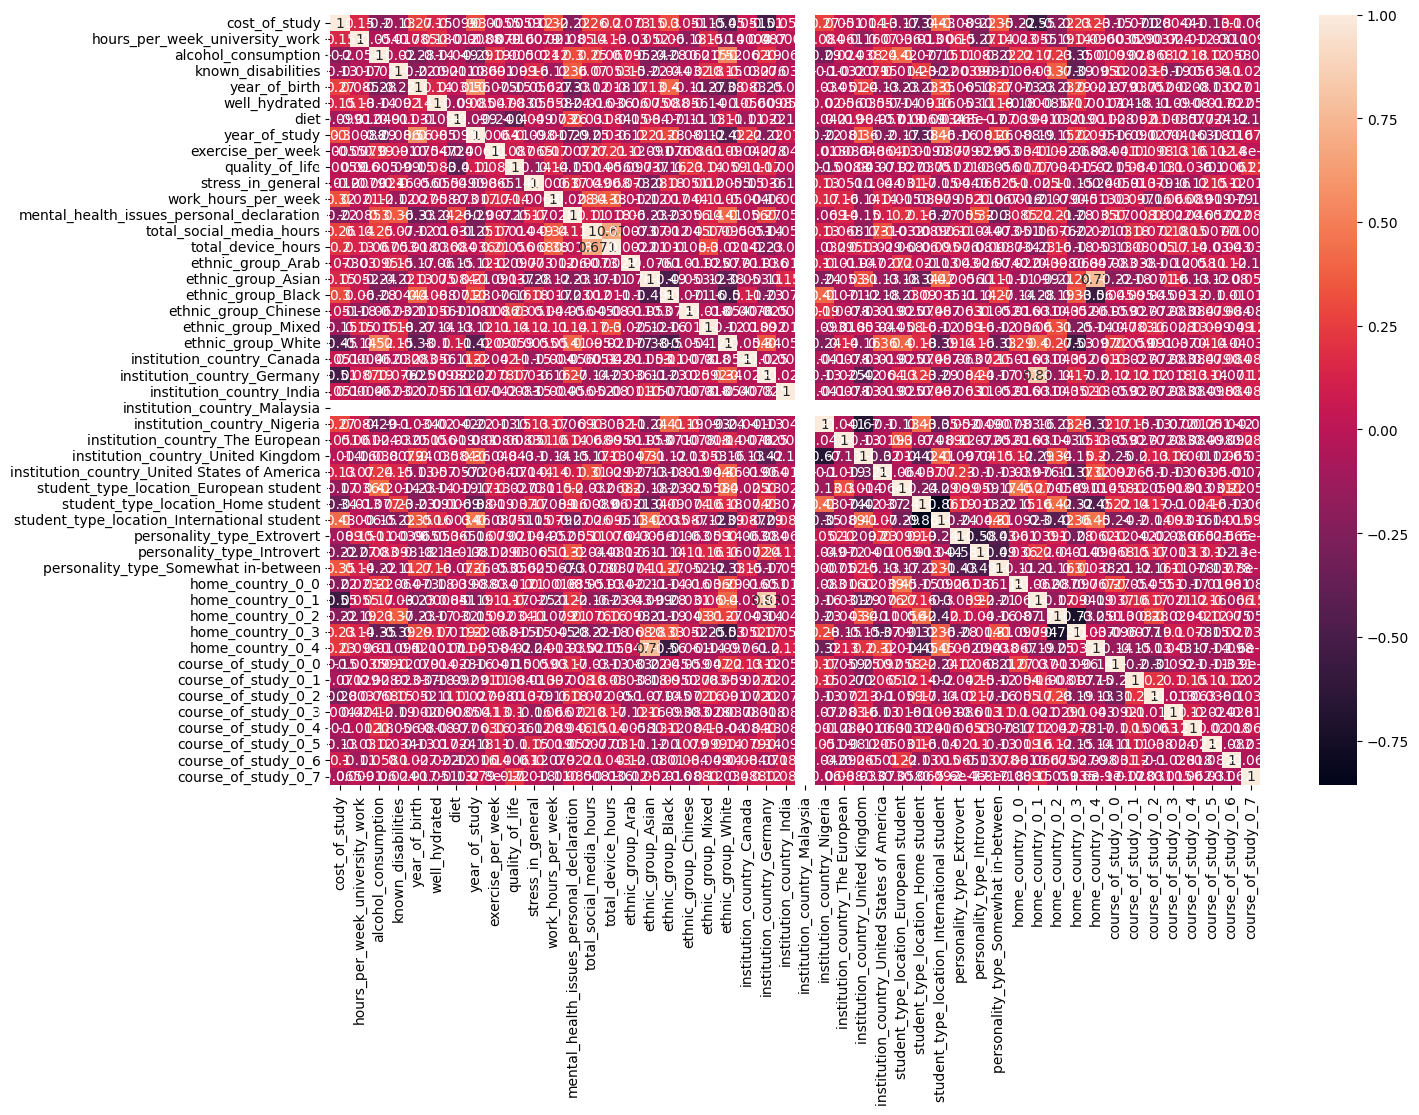

In [114]:
Correlation_Heat_Map(df)

Distribution plots of the features


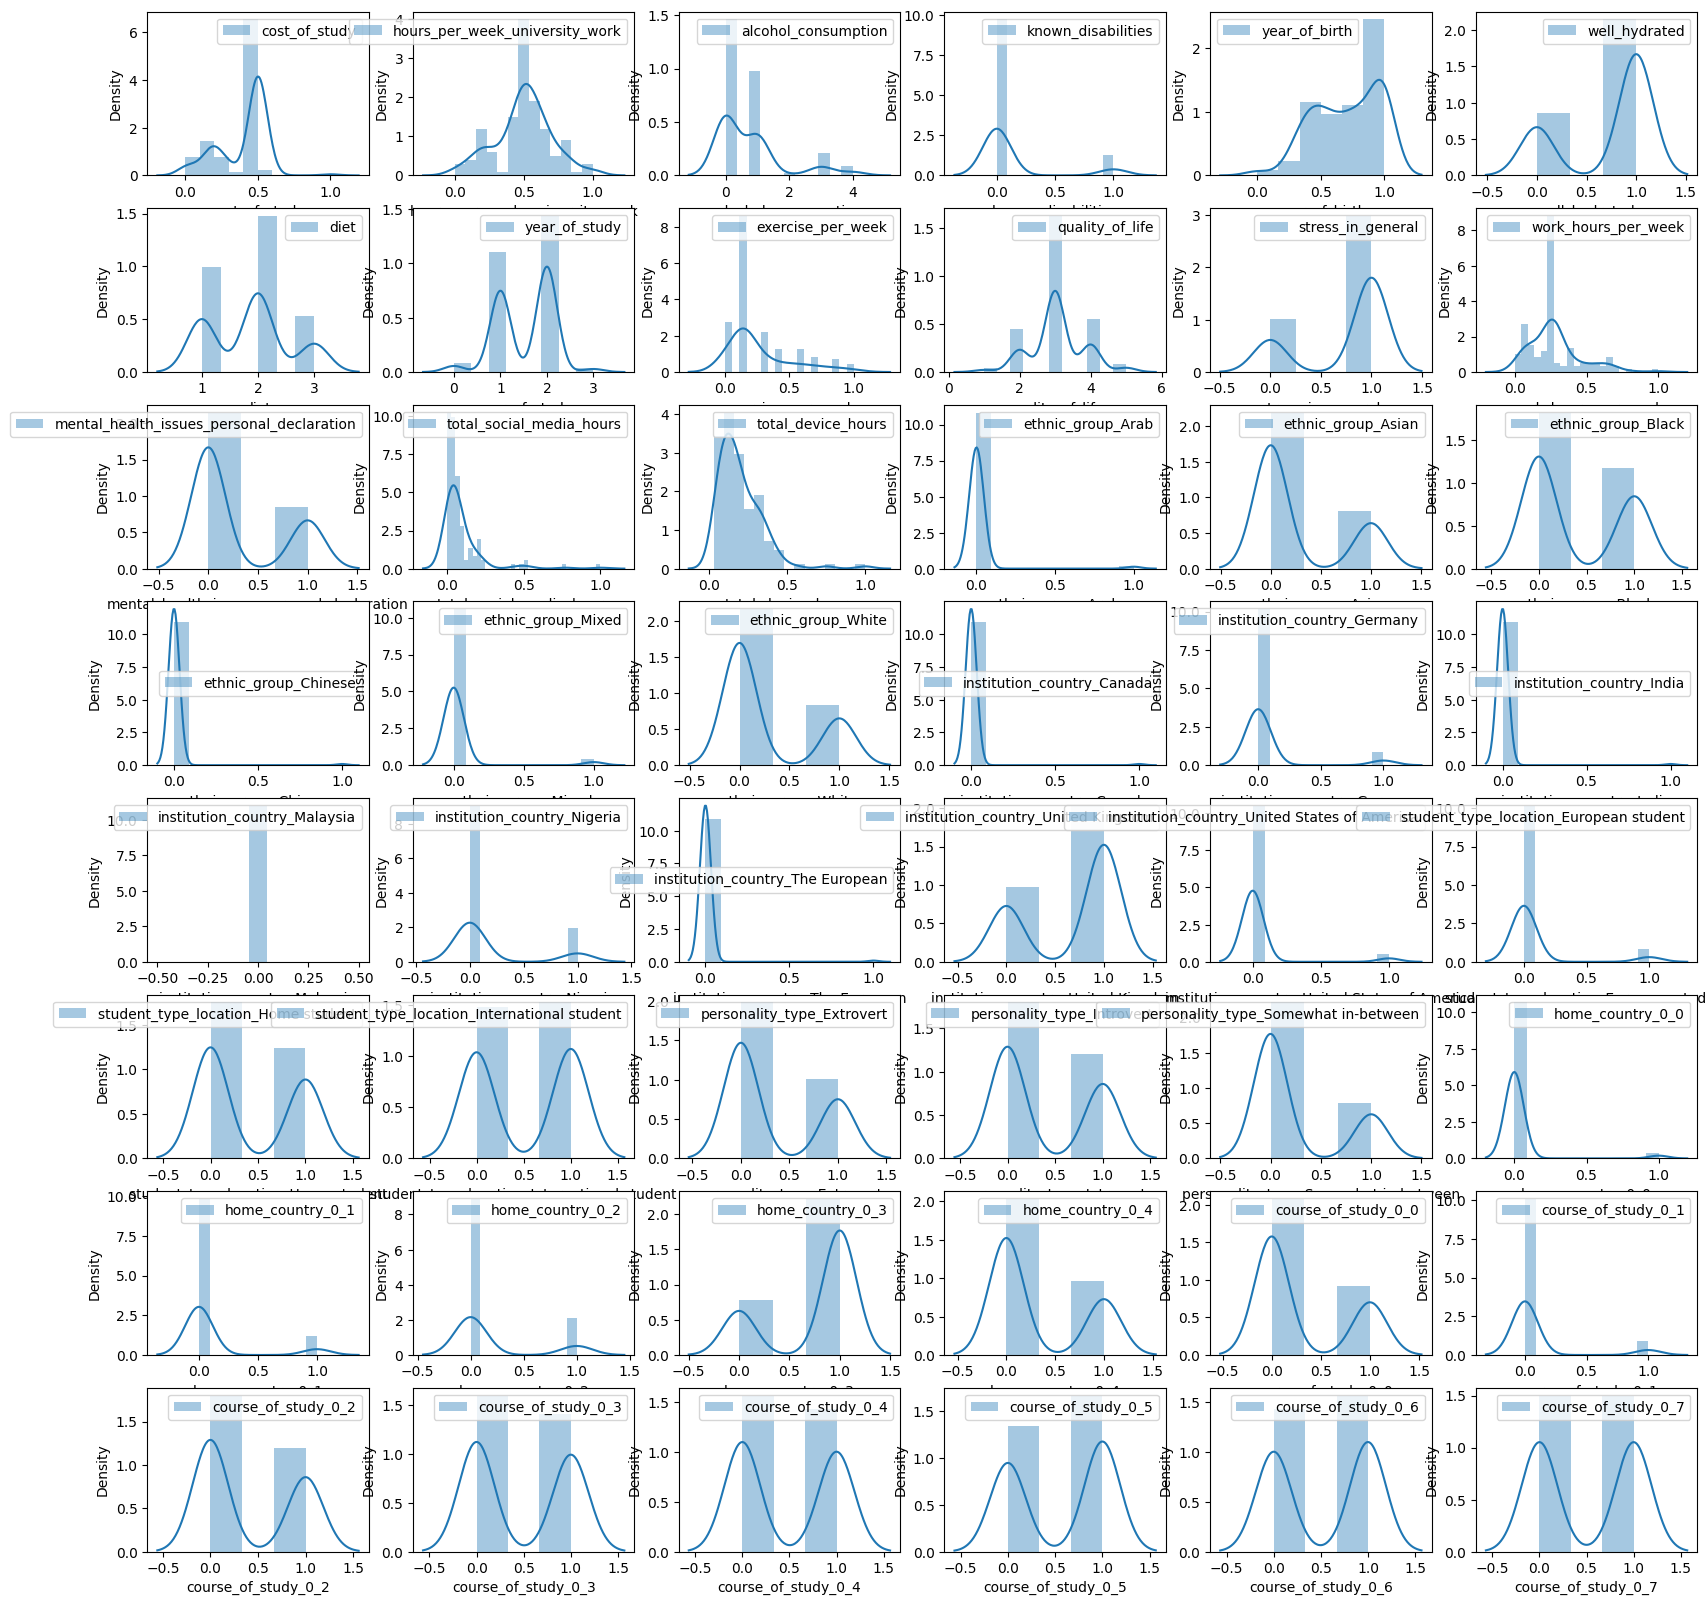

In [117]:
Dist_plots(df,'mental_health_issues_personal_declaration')

Violin plot of each feature


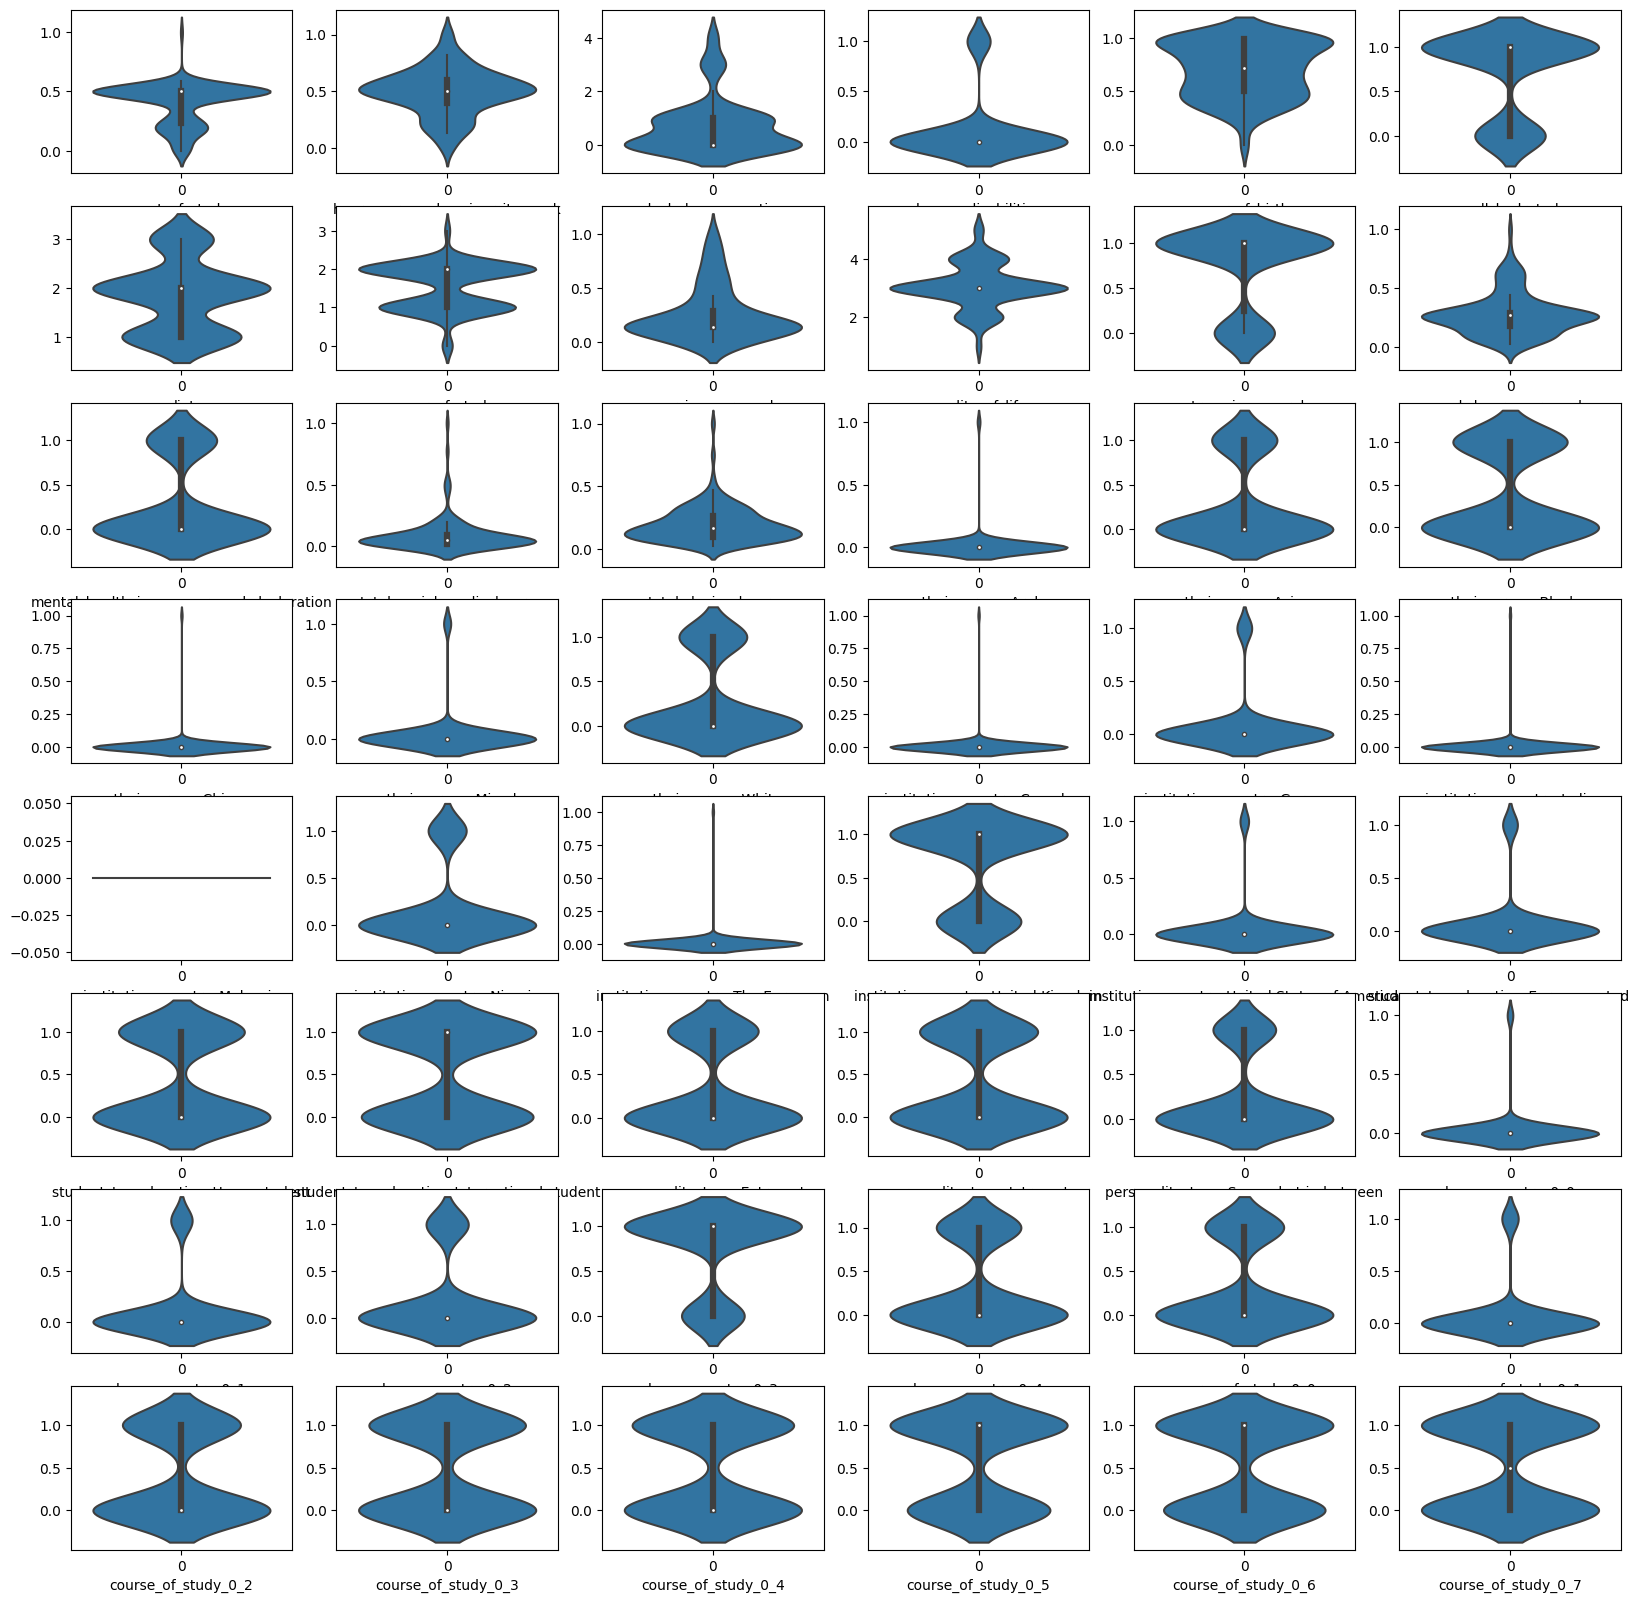

In [118]:
Violin_plot(df)

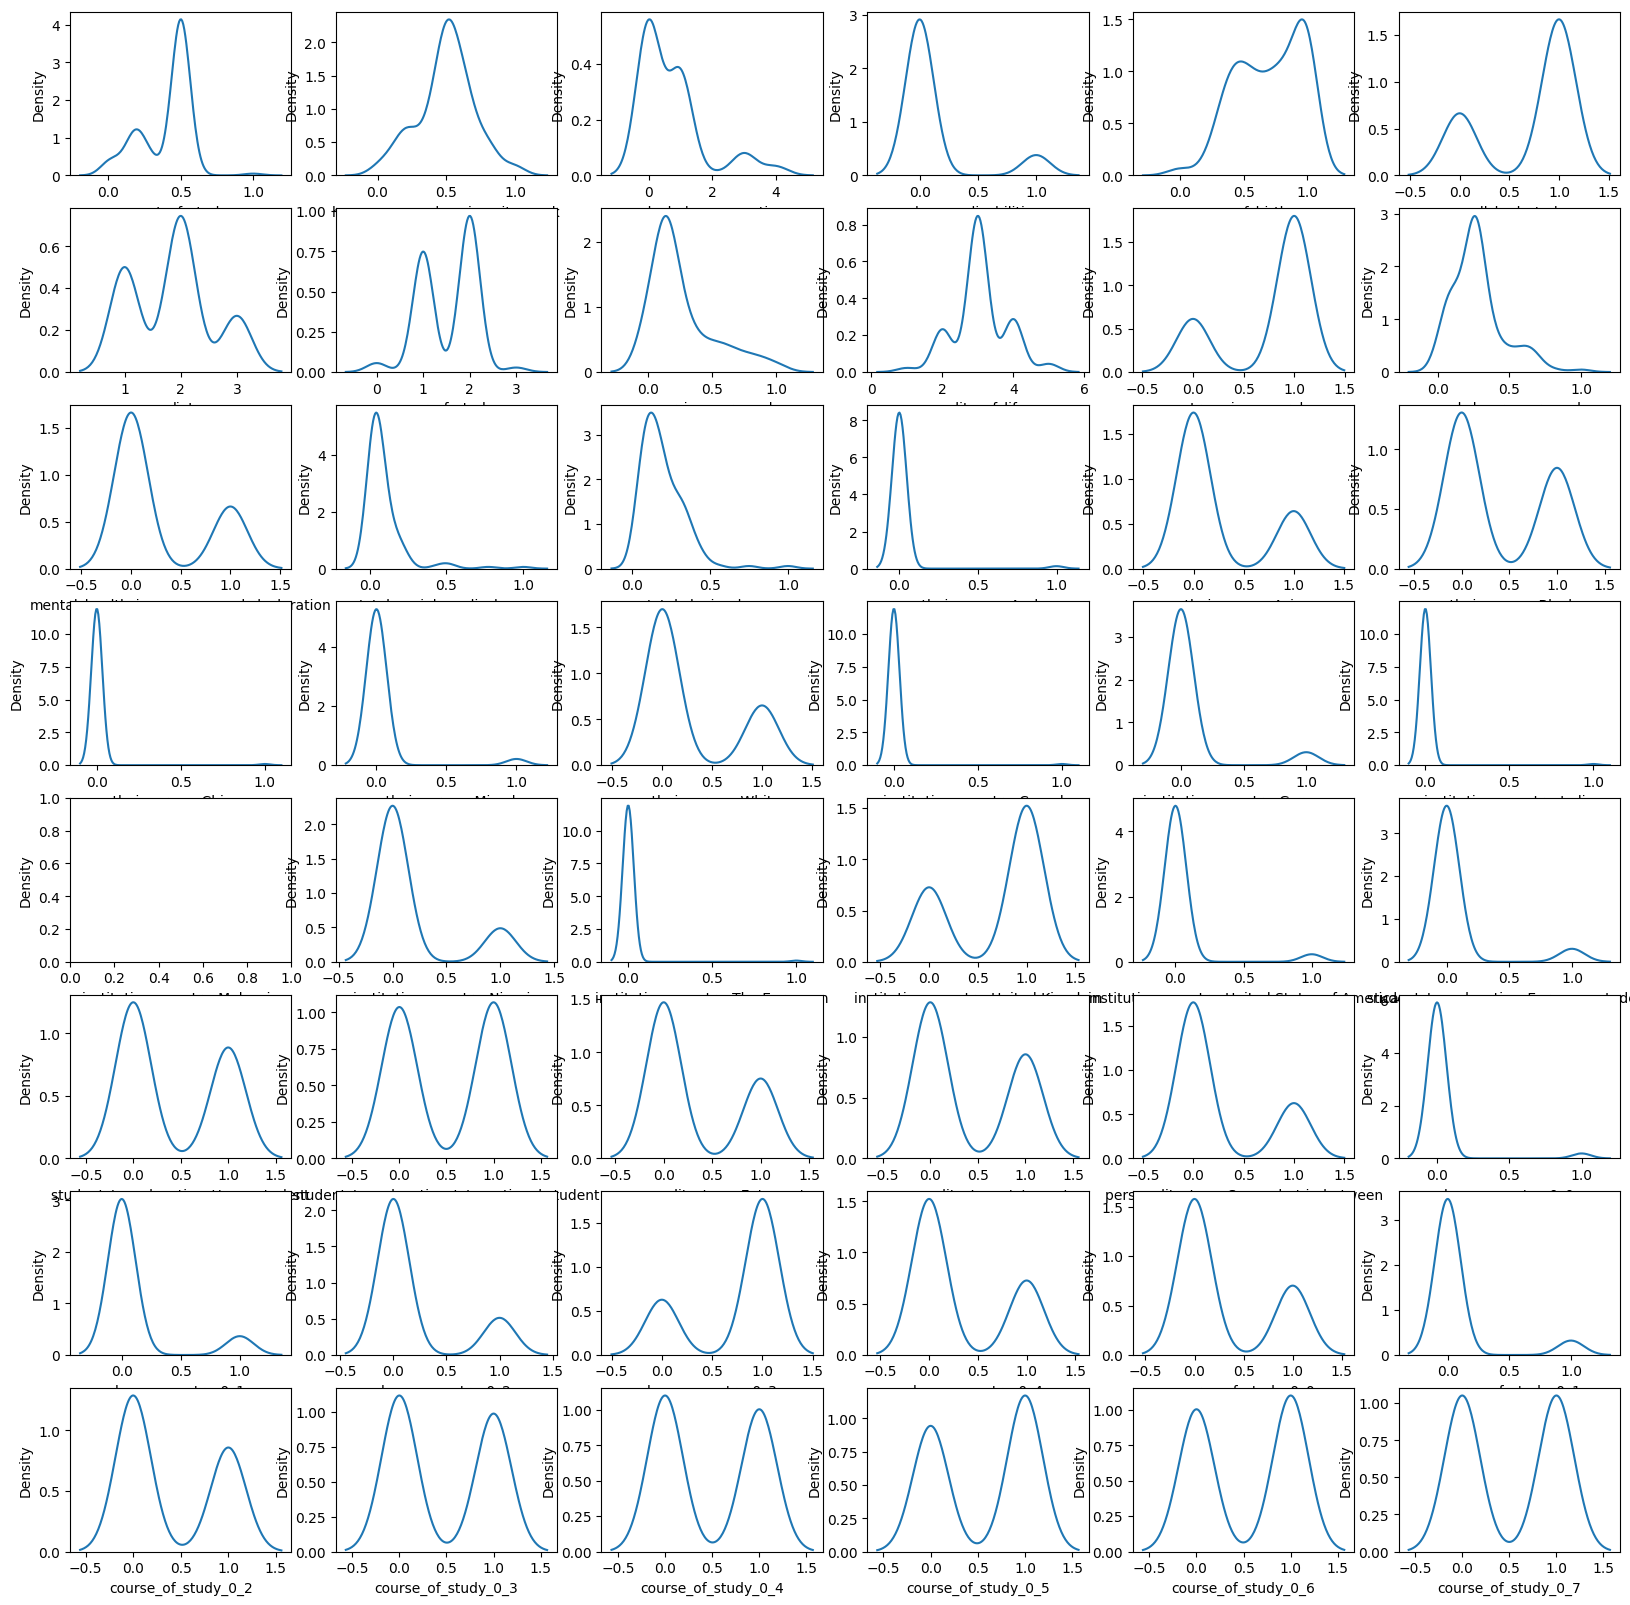

In [119]:
KDE_Plot(df)

Outliers of each feature


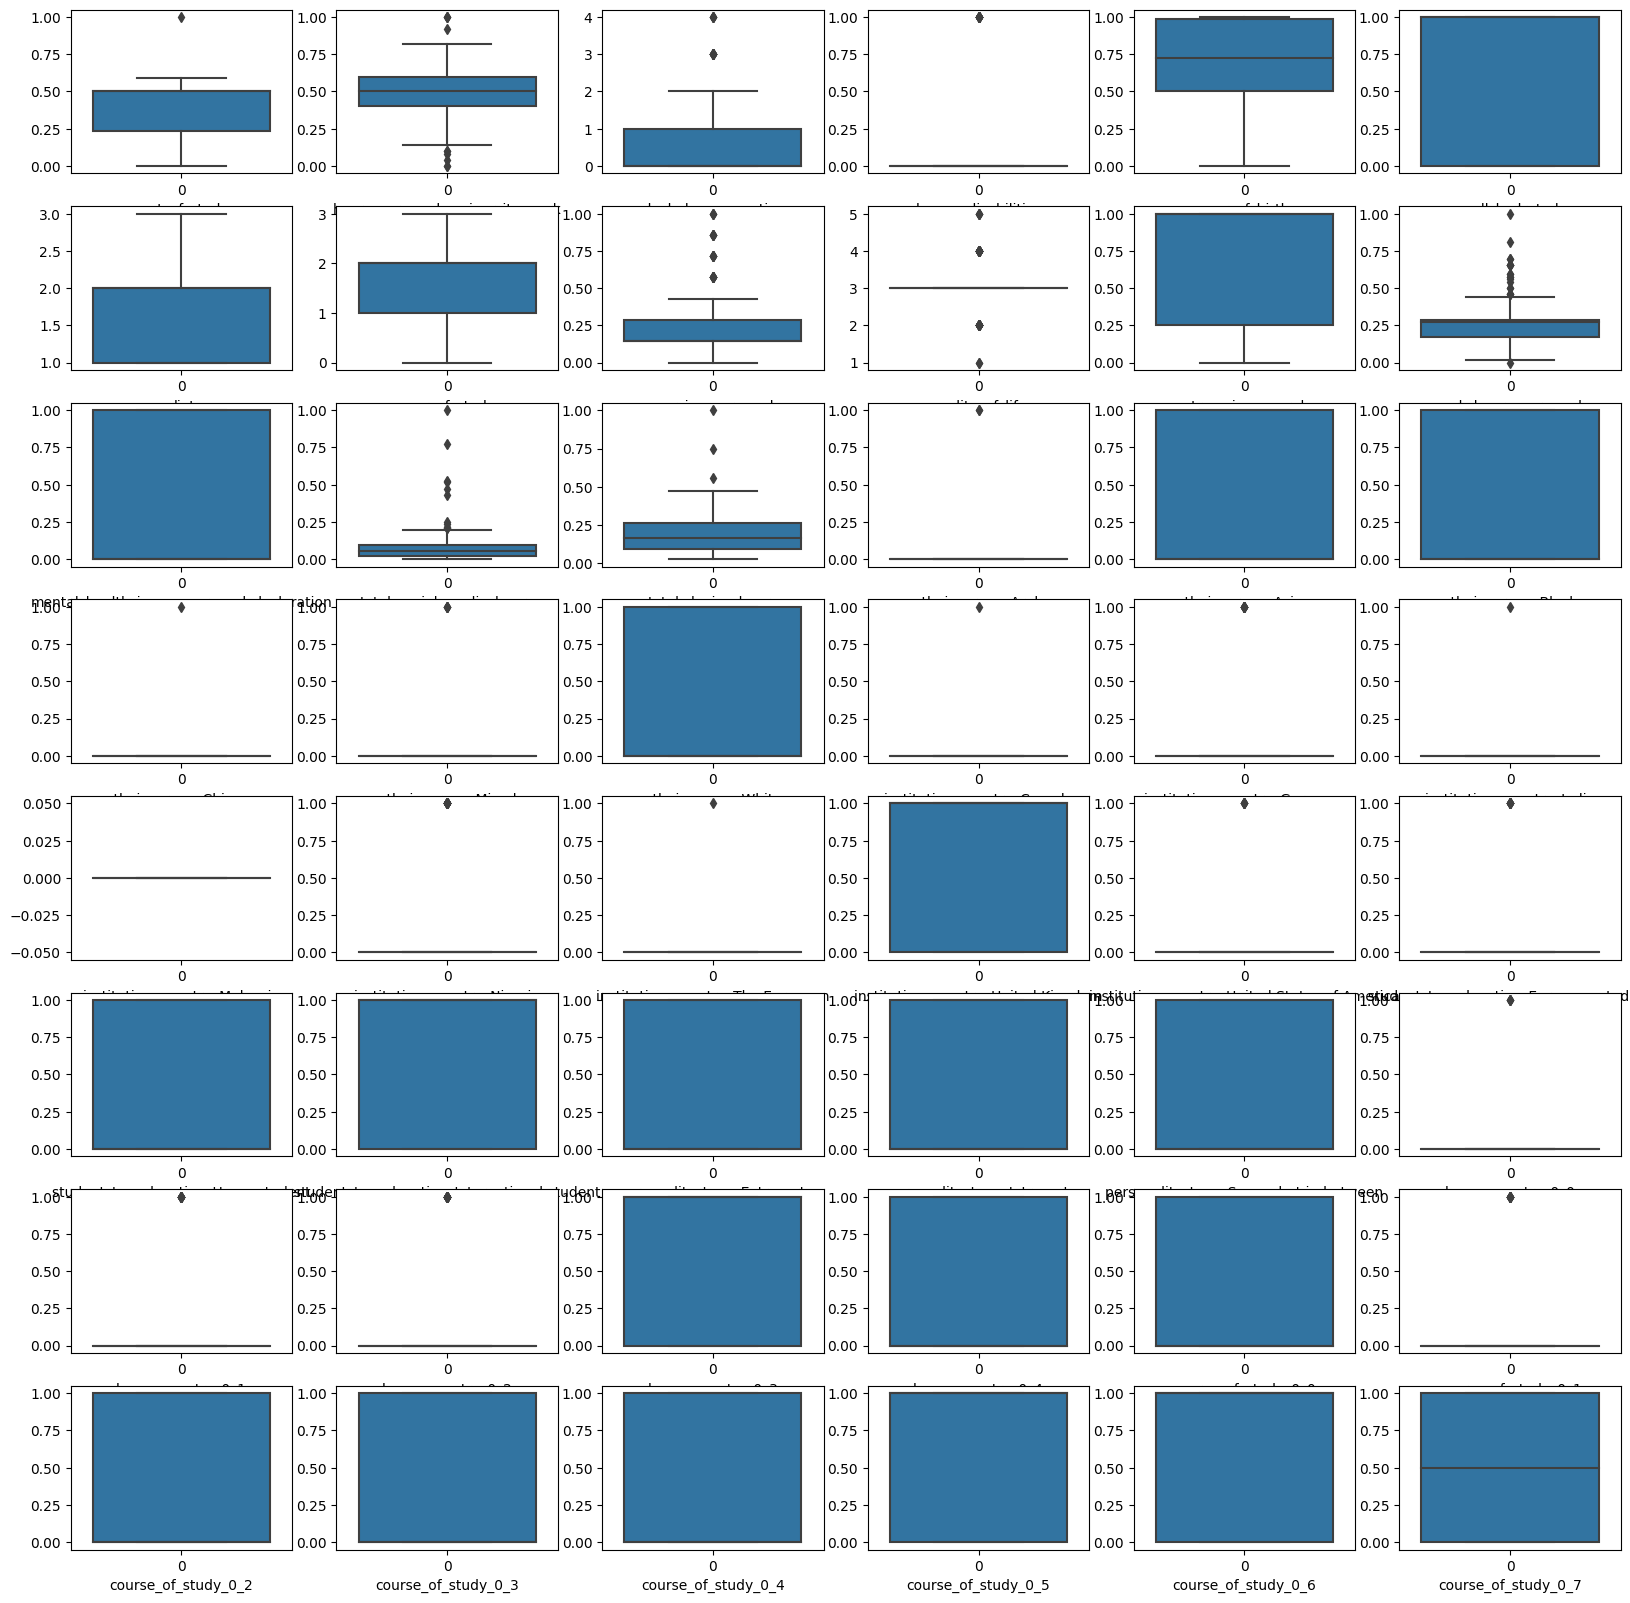

In [120]:
Box_Plot_Outliers(df)

Kurtosis of each feature


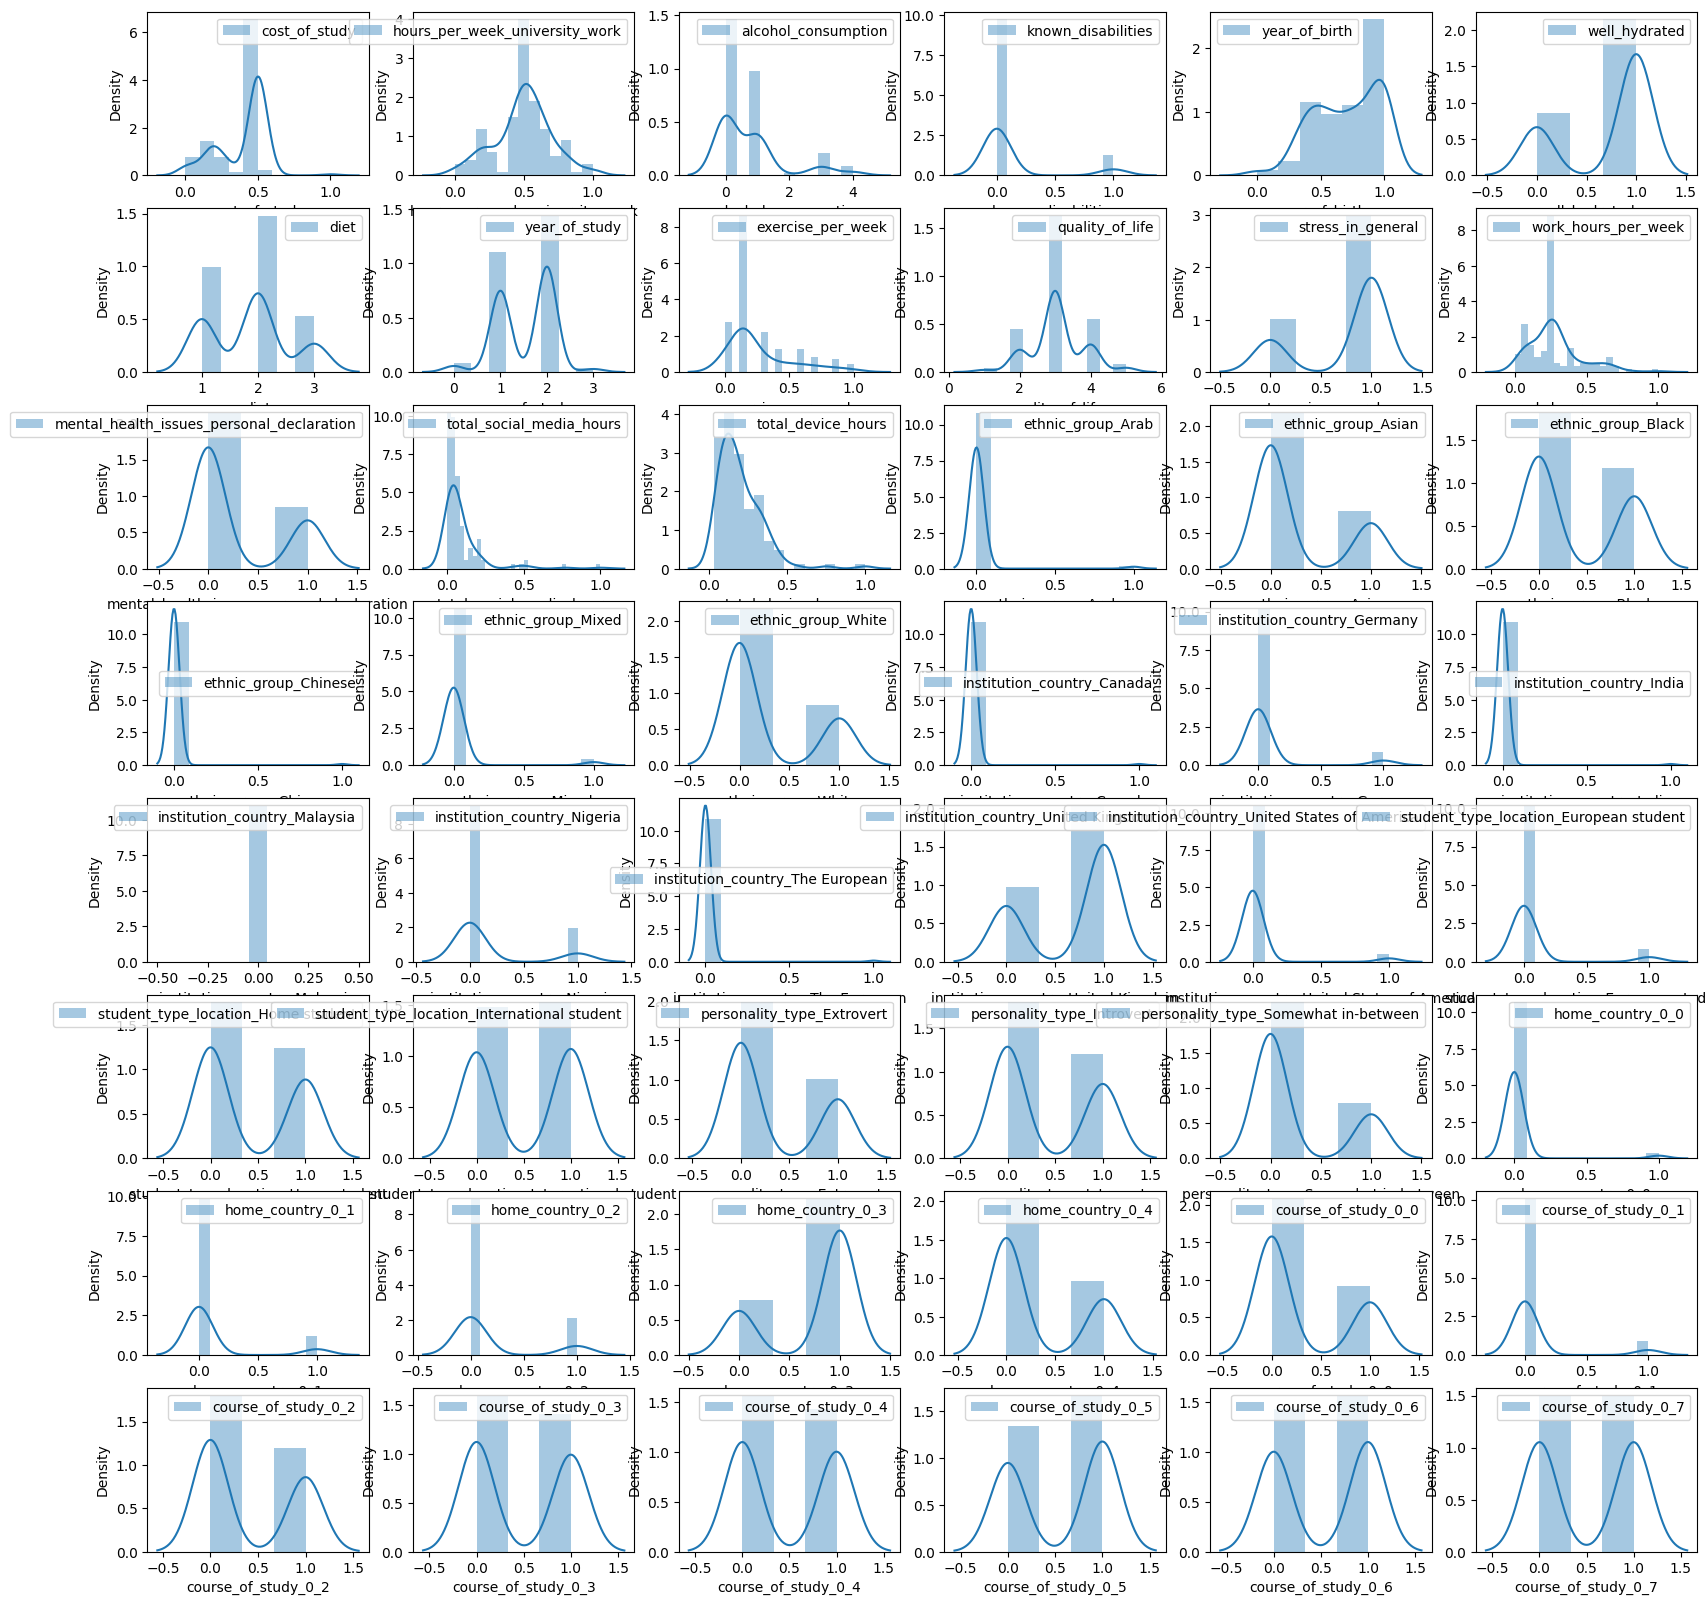

In [121]:
Plot_Kurtosis(df)

In [122]:
Plot_Skewness(df)

Skewness of each feature



Feature  Skewness
0                                  cost_of_study     -0.70
1                 hours_per_week_university_work     -0.16
2                            alcohol_consumption      1.71
3                             known_disabilities      2.44
4                                  year_of_birth     -0.42
5                                  well_hydrated     -0.97
6                                           diet      0.22
7                                  year_of_study     -0.39
8                              exercise_per_week      1.36
9                                quality_of_life      0.12
10                             stress_in_general     -1.14
11                           work_hours_per_week      1.21
12     mental_health_issues_personal_declaration      0.97
13                      total_social_media_hours      4.05
14                            total_device_hours      2.21
15                             ethnic_group_Arab      7.97
16                            ethnic_group_Asian      1.05
17                            ethnic_group_Black      0.45
18                          ethnic_group_Chinese     11.40
19                            ethnic_group_Mixed      4.86
20                            ethnic_group_White      1.01
21                    institution_country_Canada     11.40
22                   institution_country_Germany      3.21
23                     institution_country_India     11.40
24                  institution_country_Malaysia      0.00
25                   institution_country_Nigeria      1.71
26              institution_country_The European     11.40
27            institution_country_United Kingdom     -0.77
28  institution_country_United States of America      4.38
29        student_type_location_European student      3.21
30            student_type_location_Home student      0.35
31   student_type_location_International student     -0.03
32                    personality_type_Extrovert      0.69
33                    personality_type_Introvert      0.41
34          personality_type_Somewhat in-between      1.10
35                              home_country_0_0      5.50
36                              home_country_0_1      2.56
37                              home_country_0_2      1.58
38                              home_country_0_3     -1.10
39                              home_country_0_4      0.77
40                           course_of_study_0_0      0.84
41                           course_of_study_0_1      3.02
42                           course_of_study_0_2      0.41
43                           course_of_study_0_3      0.12
44                           course_of_study_0_4      0.09
45                           course_of_study_0_5     -0.22
46                           course_of_study_0_6     -0.09
47                           course_of_study_0_7      0.00

In [123]:
descriptive_statistics(df,'mental_health_issues_personal_declaration')

Descriptive statistics by target label
mental_health_issues_personal_declaration     0     1
cost_of_study       count                 93.00 37.00
                    mean                   0.42  0.34
                    std                    0.14  0.22
                    min                    0.00  0.01
                    25%                    0.50  0.18
...                                         ...   ...
course_of_study_0_7 min                    0.00  0.00
                    25%                    0.00  0.00
                    50%                    0.00  1.00
                    75%                    1.00  1.00
                    max                    1.00  1.00

[376 rows x 2 columns]



Pie Chart


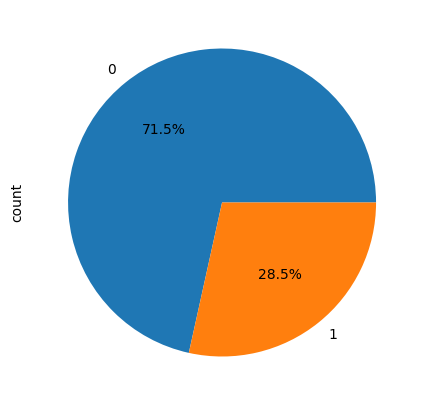

In [124]:
Plot_Pie_Chart(df,'mental_health_issues_personal_declaration')

# v. Data Transformation

### Normalizing the Numerical Features/Columns

In [135]:
# creating a list of all numerical columns to normalize them
Numerical_Columns = df.columns[df.dtypes != 'object']
for col in Numerical_Columns:
    Scaler = MinMaxScaler()
    df[col] = Scaler.fit_transform(df[col].values.reshape(-1,1))
    Scaler_FileName = './Scalers/' + str(col) + '_Scaler.pkl'
    pkl.dump(Scaler, open(Scaler_FileName, 'wb'))
df

cost_of_study              home_country ethnic_group  \
0             0.50  United States of America        White   
1             0.50                   Nigeria        Black   
2             0.50                     India        Asian   
3             0.50  United States of America        White   
4             0.50                   Nigeria        Black   
..             ...                       ...          ...   
218           0.50            United Kingdom        Black   
219           0.18            Czech Republic        White   
220           0.01                   Germany        White   
221           0.18            United Kingdom        Black   
222           0.08            United Kingdom        White   

     hours_per_week_university_work  \
0                              0.64   
1                              0.20   
2                              0.50   
3                              0.50   
4                              0.22   
..                              ...   
218                            0.62   
219                            0.60   
220                            0.42   
221                            0.70   
222                            0.00   

                                      course_of_study alcohol_consumption  \
0         Bachelor of Science in Software Engineering      Below Moderate   
1                                                 Msc           No Drinks   
2                                                 BCA           No Drinks   
3                                            History.      Below Moderate   
4                                 AI and Data science           No Drinks   
..                                                ...                 ...   
218                                             maids           No Drinks   
219  BA (Hons) Fashion Styling and Creative Direction            Moderate   
220                       BA Asian Studies (Sinology)      Below Moderate   
221                         Applied AI & Data Science           No Drinks   
222                                project management           No Drinks   

    known_disabilities     personality_type  year_of_birth well_hydrated  ...  \
0                   No            Extrovert           0.56           Yes  ...   
1                  Yes  Somewhat in-between           0.89           Yes  ...   
2                   No            Introvert           0.50           Yes  ...   
3                   No            Extrovert           0.44           Yes  ...   
4                   No            Introvert           1.00            No  ...   
..                 ...                  ...            ...           ...  ...   
218                Yes            Extrovert           1.00           Yes  ...   
219                 No            Extrovert           0.50            No  ...   
220                 No            Introvert           1.00           Yes  ...   
221                Yes            Extrovert           1.00           Yes  ...   
222                Yes            Introvert           0.78           Yes  ...   

    stress_in_general work_hours_per_week  student_type_location  \
0                 Yes                0.60       European student   
1                 Yes                0.65           Home student   
2                  No                0.27  International student   
3                  No                0.46           Home student   
4                 Yes                0.27  International student   
..                ...                 ...                    ...   
218               Yes                0.08           Home student   
219               Yes                0.08       European student   
220               Yes                0.27           Home student   
221               Yes                0.04           Home student   
222               Yes                0.27           Home student   

    mental_health_issues_personal_declaration family_earning_class  \
0                 

### Converting Categorical variables into numeric

In [136]:
# dropping the 'graduate' in year of study as this questionaire was for students
ind = df[df.year_of_study == 'Graduated'].index
df.drop(ind, inplace=True)

In [137]:
# converting the outcome variables into numeric
mental_health_issues_map = {'Yes': 1, 'No': 0}
df['mental_health_issues_personal_declaration'] = df['mental_health_issues_personal_declaration'].map(mental_health_issues_map) 
np.save(os.path.join('./Label Maps/', 'mental_health_issues_map.npy'), mental_health_issues_map)

In [138]:
# converting dichotomous data types into numeric
lbl_cols = ['stress_in_general',
            'known_disabilities','well_hydrated']
for col in lbl_cols:
    LE = LabelEncoder()
    df[col] = LE.fit_transform(df[col])
    LabelEncoder_FileName = './Label Encoders/' + col + '_LabelEncoder.pkl'
    pkl.dump(LE, open(LabelEncoder_FileName, 'wb'))

In [139]:
study_map = {'1 year course' : 0,
'Foundation year' : 0,
'HND' : 0,
'NCE' :0 ,
'Undergraduate 1st year' : 1,
'Undergraduate 2nd year' : 1,
'Undergraduate 3rd year' : 1,
'Undergraduate 4th year' : 1,
'Postgraduate 1st year' : 2,
'Postgraduate 2nd year' : 2,
'PhD 1st year' : 3,
'PhD 2nd year' : 3,
'PhD 3rd year' : 3,
'PhD 4th year' : 3,
'PhD final year' : 3}
df['year_of_study'] = df['year_of_study'].map(study_map) 
np.save(os.path.join('./Label Maps/','year_of_study.npy'), study_map)

In [140]:
# earning_map = {'Lower class (below £25,000)' : 1,'Middle class (£25,000-£54,999)' :2,'Higher class (£55,000-£90,000)' :3,
#                'Upper higher class (above £90,000)' :4}
# df['family_earning_class'] = df['family_earning_class'].map(earning_map)
# np.save(os.path.join('./Label Maps/','family_earning_class.npy'), earning_map)

In [141]:
quality_map = { 'Very Low' : 1,'Low' : 2,'Medium' : 3,
               'High' : 4,'Very High' : 5}
df['quality_of_life'] = df['quality_of_life'].map(quality_map)
np.save(os.path.join('./Label Maps/','quality_of_life.npy'), quality_map)

In [142]:
alc_map = {'No Drinks':0 ,
           'Below Moderate':1,
           'Less Moderate':2,
           'Moderate':3,
           'Above Moderate':4,
          }
df['alcohol_consumption'] = df['alcohol_consumption'].map(alc_map)
np.save(os.path.join('./Label Maps/','alcohol_consumption.npy'), alc_map)

In [143]:
diet_map = {'Healthy': 1,'Somewhat Inbetween': 2,
            'Unhealthy' : 3}
df['diet'] = df['diet'].map(diet_map)
np.save(os.path.join('./Label Maps/','diet.npy'), diet_map)

In [144]:
# ts_impact_grouped_map = {'No, it has no impact on my study nor life or health.' : 0,'Yes, on my studies.' :1,'Yes, on my life and health.' :2,'Yes, on my life, health and studies.' :3}
# df['ts_impact_Grouped'] = df['ts_impact_Grouped'].map(ts_impact_grouped_map)
# np.save(os.path.join('./Label Maps/','ts_impact_Grouped.npy'), ts_impact_grouped_map)

In [145]:
# work_field_map = {
#     'Administrative and secretarial occupations' : 0,
#     'Caring, leisure and other service occupations' : 1,
#     'Not Applicable' : 2,
#     'Professional occupations' : 3,
#     'Sales and customer service occupations' : 4,
#     'Skilled trade occupations' : 5,
# }

# df.work_field = df.work_field.map(work_field_map)
# np.save(os.path.join('./Label Maps/','work_field.npy'), work_field_map)

In [146]:
one_hot_columns = ["ethnic_group", "student_type_location", "personality_type",'family_earning_class','stress_before_exams','timetable_preference','ts_impact_Grouped']
for col in one_hot_columns:
    ohe = OneHotEncoder()
    transformed_data = ohe.fit_transform(np.expand_dims(df[col], axis=1)).toarray()
    for i, category in enumerate(ohe.get_feature_names_out([col])):
        df[category] = transformed_data[:, i]
    
    OneHotEncoder_FileName = './OneHotEncoders/' + col + '_OneHotEncoder.pkl'
    with open(OneHotEncoder_FileName, 'wb') as file:
        pkl.dump(ohe, file)

In [147]:
binary_columns=['home_country', 'course_of_study']
for col in binary_columns:
    be = BinaryEncoder()
    transformed_data = be.fit_transform(np.expand_dims(df[col], axis=1))
    transformed_data=np.array(transformed_data)
    for i, category in enumerate(be.get_feature_names_out([col])):
        df[col+'_'+category] = transformed_data[:, i]
    
    OneHotEncoder_FileName = './BinaryEncoders/' + col + '_BinaryEncoder.pkl'
    with open(OneHotEncoder_FileName, 'wb') as file:
        pkl.dump(be, file)

In [148]:
df.drop(columns=binary_columns,inplace=True)
df.drop(columns=one_hot_columns,inplace=True)

In [149]:
Categorical_Columns = df.select_dtypes(include=['object']).columns
for col in Categorical_Columns:
    LE = LabelEncoder()
    df[col] = LE.fit_transform(df[col])
    LabelEncoder_FileName = './Label Encoders/' + col + '_LabelEncoder.pkl'
    pkl.dump(LE, open(LabelEncoder_FileName, 'wb'))

In [150]:
df = df.dropna()
df.head()

cost_of_study  hours_per_week_university_work  alcohol_consumption  \
0           0.50                            0.64                    1   
1           0.50                            0.20                    0   
2           0.50                            0.50                    0   
3           0.50                            0.50                    1   
4           0.50                            0.22                    0   

   known_disabilities  year_of_birth  well_hydrated  diet  year_of_study  \
0                   0           0.56              1     2              1   
1                   1           0.89              1     2              2   
2                   0           0.50              1     1              2   
3                   0           0.44              1     1              1   
4                   0           1.00              0     2              2   

   exercise_per_week  quality_of_life  ...  home_country_0_3  \
0               0.29                3  ...                 0   
1               0.14                3  ...                 1   
2               0.14                3  ...                 1   
3               0.14                4  ...                 0   
4               0.00                3  ...                 1   

   home_country_0_4  course_of_study_0_0  course_of_study_0_1  \
0                 1                    0                    0   
1                 0                    0                    0   
2                 1                    0                    0   
3                 1                    0                    0   
4                 0                    0                    0   

   course_of_study_0_2  course_of_study_0_3  course_of_study_0_4  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   course_of_study_0_5  course_of_study_0_6  course_of_study_0_7  
0                    0                    0                    1  
1                    0                    1                    0  
2                    0                    1                    1  
3                    1                    0                    0  
4                    1                    0                    1  

[5 rows x 50 columns]

In [151]:
df.columns

Index(['cost_of_study', 'hours_per_week_university_work',
       'alcohol_consumption', 'known_disabilities', 'year_of_birth',
       'well_hydrated', 'diet', 'year_of_study', 'exercise_per_week',
       'quality_of_life', 'stress_in_general', 'work_hours_per_week',
       'mental_health_issues_personal_declaration', 'total_social_media_hours',
       'total_device_hours', 'ethnic_group_Arab', 'ethnic_group_Asian',
       'ethnic_group_Black', 'ethnic_group_Chinese', 'ethnic_group_Mixed',
       'ethnic_group_White', 'student_type_location_European student',
       'student_type_location_Home student',
       'student_type_location_International student',
       'personality_type_Extrovert', 'personality_type_Introvert',
       'personality_type_Somewhat in-between',
       'family_earning_class_Higher class', 'family_earning_class_Lower class',
       'family_earning_class_Middle class', 'stress_before_exams_No',
       'stress_before_exams_Yes',
       'timetable_preference_I prefer 

# vi. Feature Importance and Feature Selection

In [152]:
def Plot_Feature_Importance_to_Target_Label(dataframe,label_name):
    '''Function to plot the feature importance to the target label'''
    print("Feature importance to target label using two methods")
    
    #First Method Random Forest
    print("Random Forest")
    DF_Compare_Random_Forest = pd.DataFrame()
    X = dataframe.drop(label_name,axis=1)
    y = dataframe[label_name]
    model = RandomForestClassifier()
    model.fit(X,y)
    DF_Compare_Random_Forest['Random Forest Importance'] = model.feature_importances_
    DF_Compare_Random_Forest['Random Forest Importance %'] = DF_Compare_Random_Forest['Random Forest Importance']*100

    #Second Method Recursive Feature Elimination
    print("Recursive Feature Elimination")
    DF_Compare_RFE = pd.DataFrame()
    model = RandomForestClassifier()
    rfe = RFE(model, n_features_to_select=1, step=1)
    fit = rfe.fit(X, y)
    DF_Compare_RFE['Recursive Feature Elimination Importance'] = fit.ranking_

    DF_Compare_RFE.index = X.columns
    DF_Compare_Random_Forest.index = X.columns

    DF_Compare_Random_Forest = DF_Compare_Random_Forest.sort_values(by='Random Forest Importance %',ascending=False)
    DF_Compare_RFE = DF_Compare_RFE.sort_values(by='Recursive Feature Elimination Importance',ascending=False)

    print("Feature importance to target label using two methods")
    return DF_Compare_Random_Forest,DF_Compare_RFE,

def Drop_Rows_Below_25_Percentile(df,col):
    '''Function to drop rows below 25 percentile'''
    #Get rows that fall in the 25 percentile
    Q1 = df[col].quantile(0.25)
    print('Following columns are being dropped')
    print(df[df[col]<Q1].sort_values(by=col,ascending=False))
    print()
    Temp = df[df[col]>=Q1]
    return Temp

In [153]:
DF_Compare_Random_Forest,DF_Compare_RFE = Plot_Feature_Importance_to_Target_Label(df,'mental_health_issues_personal_declaration')

Feature importance to target label using two methods
Random Forest
Recursive Feature Elimination
Feature importance to target label using two methods


In [154]:
DF_Compare_Random_Forest

Random Forest Importance  \
cost_of_study                                                           0.08   
year_of_birth                                                           0.07   
hours_per_week_university_work                                          0.07   
total_social_media_hours                                                0.05   
work_hours_per_week                                                     0.05   
diet                                                                    0.04   
total_device_hours                                                      0.04   
quality_of_life                                                         0.04   
ethnic_group_White                                                      0.04   
alcohol_consumption                                                     0.04   
known_disabilities                                                      0.03   
exercise_per_week                                                       0.03   
personality_type_Somewhat in-between                                    0.03   
personality_type_Introvert                                              0.02   
home_country_0_3                                                        0.02   
year_of_study                                                           0.02   
course_of_study_0_2                                                     0.02   
well_hydrated                                                           0.02   
course_of_study_0_7                                                     0.02   
student_type_location_International student                             0.01   
course_of_study_0_3                                                     0.01   
home_country_0_1                                                        0.01   
family_earning_class_Middle class                                       0.01   
course_of_study_0_6                                                     0.01   
ethnic_group_Asian                                                      0.01   
family_earning_class_Higher class                                       0.01   
personality_type_Extrovert                                              0.01   
ethnic_group_Black                                                      0.01   
course_of_study_0_0                                                     0.01   
stress_in_general                                                       0.01   
course_of_study_0_4                                                     0.01   
home_country_0_4                                                        0.01   
ts_impact_Grouped_Yes, on my life, health and s...                      0.01   
student_type_location_European student                                  0.01   
home_country_0_2                                                        0.01   
student_type_location_Home student                                      0.01   
ethnic_group_Mixed                                                      0.01   
course_of_study_0_5                                                     0.01   
family_earning_class_Lower class                                        0.01   
course_of_study_0_1                                                     0.01   
ts_impact_Grouped_Yes, on my studies                                    0.01   
timetable_preference_I prefer my timetable to b...                      0.01   
ts_impact_Grouped_No, it has no impact on my st...                      0.01   
timetable_preference_I prefer my timetable to b...                      0.01   
stress_before_exams_Yes                                                 0.01   
stress_before_exams_No                                                  0.00   
home_country_0_0                                                        0.00   
ethnic_group_Arab                                                       0.00   
ethnic_group_Chinese                                                    0.00   

                                                   

In [155]:
DF_Compare_RFE

Recursive Feature Elimination Importance
ethnic_group_Chinese                                                                      49
ethnic_group_Arab                                                                         48
home_country_0_0                                                                          47
stress_before_exams_No                                                                    46
ts_impact_Grouped_Yes, on my studies                                                      45
ethnic_group_Mixed                                                                        44
course_of_study_0_5                                                                       43
stress_before_exams_Yes                                                                   42
home_country_0_2                                                                          41
home_country_0_4                                                                          40
student_type_location_Home student                                                        39
timetable_preference_I prefer my timetable to b...                                        38
ts_impact_Grouped_No, it has no impact on my st...                                        37
course_of_study_0_1                                                                       36
home_country_0_1                                                                          35
family_earning_class_Higher class                                                         34
ts_impact_Grouped_Yes, on my life, health and s...                                        33
student_type_location_European student                                                    32
timetable_preference_I prefer my timetable to b...                                        31
personality_type_Extrovert                                                                30
family_earning_class_Middle class                                                         29
family_earning_class_Lower class                                                          28
personality_type_Somewhat in-between                                                      27
ethnic_group_Asian                                                                        26
ethnic_group_Black                                                                        25
course_of_study_0_4                                                                       24
student_type_location_International student                                               23
stress_in_general                                                                         22
course_of_study_0_0                                                                       21
course_of_study_0_3                                                                       20
course_of_study_0_6                                                                       19
home_country_0_3                                                                          18
course_of_study_0_2                                                                       17
course_of_study_0_7                                                                       16
year_of_study                                                                             15
well_hydrated                                                                             14
exercise_per_week                                                                         13
diet                                                                                      12
personality_type_Introvert                                                                11
known_disabilities                                                                        10
alcohol_consumption                                                                        9
quality_of_life                                                                            8
ethnic_group_White                                   

In [156]:
'''
Note the ordering/sorting of the column Recursive Feature Elimination Importance will be affected in this dataframe
because the indexes have to match, for this the sorting will be affected.
'''
DF_Collective = pd.concat([DF_Compare_Random_Forest, DF_Compare_RFE], axis=1)
DF_Collective

Random Forest Importance  \
cost_of_study                                                           0.08   
year_of_birth                                                           0.07   
hours_per_week_university_work                                          0.07   
total_social_media_hours                                                0.05   
work_hours_per_week                                                     0.05   
diet                                                                    0.04   
total_device_hours                                                      0.04   
quality_of_life                                                         0.04   
ethnic_group_White                                                      0.04   
alcohol_consumption                                                     0.04   
known_disabilities                                                      0.03   
exercise_per_week                                                       0.03   
personality_type_Somewhat in-between                                    0.03   
personality_type_Introvert                                              0.02   
home_country_0_3                                                        0.02   
year_of_study                                                           0.02   
course_of_study_0_2                                                     0.02   
well_hydrated                                                           0.02   
course_of_study_0_7                                                     0.02   
student_type_location_International student                             0.01   
course_of_study_0_3                                                     0.01   
home_country_0_1                                                        0.01   
family_earning_class_Middle class                                       0.01   
course_of_study_0_6                                                     0.01   
ethnic_group_Asian                                                      0.01   
family_earning_class_Higher class                                       0.01   
personality_type_Extrovert                                              0.01   
ethnic_group_Black                                                      0.01   
course_of_study_0_0                                                     0.01   
stress_in_general                                                       0.01   
course_of_study_0_4                                                     0.01   
home_country_0_4                                                        0.01   
ts_impact_Grouped_Yes, on my life, health and s...                      0.01   
student_type_location_European student                                  0.01   
home_country_0_2                                                        0.01   
student_type_location_Home student                                      0.01   
ethnic_group_Mixed                                                      0.01   
course_of_study_0_5                                                     0.01   
family_earning_class_Lower class                                        0.01   
course_of_study_0_1                                                     0.01   
ts_impact_Grouped_Yes, on my studies                                    0.01   
timetable_preference_I prefer my timetable to b...                      0.01   
ts_impact_Grouped_No, it has no impact on my st...                      0.01   
timetable_preference_I prefer my timetable to b...                      0.01   
stress_before_exams_Yes                                                 0.01   
stress_before_exams_No                                                  0.00   
home_country_0_0                                                        0.00   
ethnic_group_Arab                                                       0.00   
ethnic_group_Chinese                                                    0.00   

                                                   

In [157]:
np.sum(DF_Compare_Random_Forest['Random Forest Importance'])

1.0

In [158]:
DF_Compare_Random_Forest = Drop_Rows_Below_25_Percentile(DF_Compare_Random_Forest, 'Random Forest Importance %')
len(DF_Compare_Random_Forest),DF_Compare_Random_Forest

Following columns are being dropped
                                                    Random Forest Importance  \
course_of_study_0_5                                                     0.01   
family_earning_class_Lower class                                        0.01   
course_of_study_0_1                                                     0.01   
ts_impact_Grouped_Yes, on my studies                                    0.01   
timetable_preference_I prefer my timetable to b...                      0.01   
ts_impact_Grouped_No, it has no impact on my st...                      0.01   
timetable_preference_I prefer my timetable to b...                      0.01   
stress_before_exams_Yes                                                 0.01   
stress_before_exams_No                                                  0.00   
home_country_0_0                                                        0.00   
ethnic_group_Arab                                                       0.00   
ethn

(37,
                                                     Random Forest Importance  \
 cost_of_study                                                           0.08   
 year_of_birth                                                           0.07   
 hours_per_week_university_work                                          0.07   
 total_social_media_hours                                                0.05   
 work_hours_per_week                                                     0.05   
 diet                                                                    0.04   
 total_device_hours                                                      0.04   
 quality_of_life                                                         0.04   
 ethnic_group_White                                                      0.04   
 alcohol_consumption                                                     0.04   
 known_disabilities                                                      0.03   
 exercise_per_week     

In [159]:
Feature_Selected_Columns = list(DF_Compare_Random_Forest.index)
Feature_Selected_Columns.append('mental_health_issues_personal_declaration')
len(Feature_Selected_Columns),Feature_Selected_Columns

(38,
 ['cost_of_study',
  'year_of_birth',
  'hours_per_week_university_work',
  'total_social_media_hours',
  'work_hours_per_week',
  'diet',
  'total_device_hours',
  'quality_of_life',
  'ethnic_group_White',
  'alcohol_consumption',
  'known_disabilities',
  'exercise_per_week',
  'personality_type_Somewhat in-between',
  'personality_type_Introvert',
  'home_country_0_3',
  'year_of_study',
  'course_of_study_0_2',
  'well_hydrated',
  'course_of_study_0_7',
  'student_type_location_International student',
  'course_of_study_0_3',
  'home_country_0_1',
  'family_earning_class_Middle class',
  'course_of_study_0_6',
  'ethnic_group_Asian',
  'family_earning_class_Higher class',
  'personality_type_Extrovert',
  'ethnic_group_Black',
  'course_of_study_0_0',
  'stress_in_general',
  'course_of_study_0_4',
  'home_country_0_4',
  'ts_impact_Grouped_Yes, on my life, health and studies',
  'student_type_location_European student',
  'home_country_0_2',
  'student_type_location_Home st

In [160]:
# df = df[[
#    'ethnic_group',
#   'cost_of_study',
#   'hours_per_week_university_work',
#   'course_of_study',
#   'year_of_birth',
#   'social_platform',
#   'total_social_media_hours',
#   'total_device_hours',
#   'home_country',
#   'known_disabilities',
#   'diet',
#   'work_hours_per_week',
#   'quality_of_life',
#   'alcohol_consumption',
#   'year_of_study',
#   'exercise_per_week',
#   'mental_health_issues_personal_declaration'
# ]]

# vii. Classification Modelling and Evaluation

In [161]:
X = df.drop('mental_health_issues_personal_declaration',axis=1)
y = df['mental_health_issues_personal_declaration']

In [162]:
# #Keeping only those columns which are in the "fresh data" which will be used for the inference
# X = X.drop([
#     'diagnosed_professional',
#     'hours_between_lectures',
#     'hours_per_week_lectures',
#     'hours_socialising',
#     'gender',
#     'work_field',
# ],axis=1)

In [163]:
for x in X.columns:
    print(x)

cost_of_study
hours_per_week_university_work
alcohol_consumption
known_disabilities
year_of_birth
well_hydrated
diet
year_of_study
exercise_per_week
quality_of_life
stress_in_general
work_hours_per_week
total_social_media_hours
total_device_hours
ethnic_group_Arab
ethnic_group_Asian
ethnic_group_Black
ethnic_group_Chinese
ethnic_group_Mixed
ethnic_group_White
student_type_location_European student
student_type_location_Home student
student_type_location_International student
personality_type_Extrovert
personality_type_Introvert
personality_type_Somewhat in-between
family_earning_class_Higher class
family_earning_class_Lower class
family_earning_class_Middle class
stress_before_exams_No
stress_before_exams_Yes
timetable_preference_I prefer my timetable to be compact. (having all my classes in one day or two days in the week)
timetable_preference_I prefer my timetable to be spread with long gaps in between classes (eg, 1-2 modules per day, spread over 3 times per week)
ts_impact_Grouped_

In [164]:
X

cost_of_study  hours_per_week_university_work  alcohol_consumption  \
0             0.50                            0.64                    1   
1             0.50                            0.20                    0   
2             0.50                            0.50                    0   
3             0.50                            0.50                    1   
4             0.50                            0.22                    0   
..             ...                             ...                  ...   
218           0.50                            0.62                    0   
219           0.18                            0.60                    3   
220           0.01                            0.42                    1   
221           0.18                            0.70                    0   
222           0.08                            0.00                    0   

     known_disabilities  year_of_birth  well_hydrated  diet  year_of_study  \
0                     0           0.56              1     2              1   
1                     1           0.89              1     2              2   
2                     0           0.50              1     1              2   
3                     0           0.44              1     1              1   
4                     0           1.00              0     2              2   
..                  ...            ...            ...   ...            ...   
218                   1           1.00              1     1              2   
219                   0           0.50              0     1              1   
220                   0           1.00              1     2              1   
221                   1           1.00              1     1              2   
222                   1           0.78              1     3              2   

     exercise_per_week  quality_of_life  ...  home_country_0_3  \
0                 0.29                3  ...                 0   
1                 0.14                3  ...                 1   
2                 0.14                3  ...                 1   
3                 0.14                4  ...                 0   
4                 0.00                3  ...                 1   
..                 ...              ...  ...               ...   
218               0.86                3  ...                 0   
219               0.43                3  ...                 1   
220               0.00                3  ...                 1   
221               0.71                3  ...                 0   
222               0.14                2  ...                 0   

     home_country_0_4  course_of_study_0_0  course_of_study_0_1  \
0                   1                    0                    0   
1                   0                    0                    0   
2                   1                    0                    0   
3                   1                    0                    0   
4                   0                    0                    0   
..                ...                  ...                  ...   
218                 0                    1                    0   
219                 1                    1                    0   
220                 0                    1                    0   
221                 0                    1                    0   
222                 0                    1                    0   

     course_of_study_0_2  course_of_study_0_3  course_of_study_0_4  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    0                    0   
4                      0                    0                    0   
..                   ...                  ...                  ...   
218                    1                    0                    0   
219      

In [165]:
#Keeping a copy of the dataframe for later use
RawDF = df.copy(deep=True)
RawDF

cost_of_study  hours_per_week_university_work  alcohol_consumption  \
0             0.50                            0.64                    1   
1             0.50                            0.20                    0   
2             0.50                            0.50                    0   
3             0.50                            0.50                    1   
4             0.50                            0.22                    0   
..             ...                             ...                  ...   
218           0.50                            0.62                    0   
219           0.18                            0.60                    3   
220           0.01                            0.42                    1   
221           0.18                            0.70                    0   
222           0.08                            0.00                    0   

     known_disabilities  year_of_birth  well_hydrated  diet  year_of_study  \
0                     0           0.56              1     2              1   
1                     1           0.89              1     2              2   
2                     0           0.50              1     1              2   
3                     0           0.44              1     1              1   
4                     0           1.00              0     2              2   
..                  ...            ...            ...   ...            ...   
218                   1           1.00              1     1              2   
219                   0           0.50              0     1              1   
220                   0           1.00              1     2              1   
221                   1           1.00              1     1              2   
222                   1           0.78              1     3              2   

     exercise_per_week  quality_of_life  ...  home_country_0_3  \
0                 0.29                3  ...                 0   
1                 0.14                3  ...                 1   
2                 0.14                3  ...                 1   
3                 0.14                4  ...                 0   
4                 0.00                3  ...                 1   
..                 ...              ...  ...               ...   
218               0.86                3  ...                 0   
219               0.43                3  ...                 1   
220               0.00                3  ...                 1   
221               0.71                3  ...                 0   
222               0.14                2  ...                 0   

     home_country_0_4  course_of_study_0_0  course_of_study_0_1  \
0                   1                    0                    0   
1                   0                    0                    0   
2                   1                    0                    0   
3                   1                    0                    0   
4                   0                    0                    0   
..                ...                  ...                  ...   
218                 0                    1                    0   
219                 1                    1                    0   
220                 0                    1                    0   
221                 0                    1                    0   
222                 0                    1                    0   

     course_of_study_0_2  course_of_study_0_3  course_of_study_0_4  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    0                    0   
4                      0                    0                    0   
..                   ...                  ...                  ...   
218                    1                    0                    0   
219      

### Functions that will be used multiple times in different sections

In [166]:
def Evaluate_Dataset_Using_LazyClassifier(xtrain, xtest, ytrain, ytest):
    '''Function to evaluate the dataset using LazyClassifier, which evaluates on 29 different models'''
    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = clf.fit(xtrain, xtest, ytrain, ytest)
    return models

In [167]:
def Oversample_Using_SMOTE(xtrain,ytrain):
    '''Function to oversample the given dataset using SMOTE'''
    sm = SMOTE(random_state=42)
    xtrain_res, ytrain_res = sm.fit_resample(xtrain, ytrain)
    return xtrain_res, ytrain_res

def OverSample_DF(df):
    '''Function to split dataframe into traina and test, and oversample the train dataset only'''
    train_df,test_df = train_test_split(df,test_size=0.15,random_state=42)
    Train_X,Train_Y = train_df.drop('mental_health_issues_personal_declaration',axis=1),train_df['mental_health_issues_personal_declaration']
    SMOTE_Train_X, SMOTE_Train_Y = Oversample_Using_SMOTE(Train_X,Train_Y)
    Test_X_Not_SMOTE, Test_Y_Not_SMOTE = test_df.drop('mental_health_issues_personal_declaration',axis=1),test_df['mental_health_issues_personal_declaration']
    return SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE

def Get_Data_Train_Test_Splits(df):
    xtrain,xtest,ytrain,ytest = train_test_split(df.drop('mental_health_issues_personal_declaration',axis=1),df['mental_health_issues_personal_declaration'],test_size=0.15,random_state=42)
    return xtrain,xtest,ytrain,ytest

### Comparison of Non-SMOTE and SMOTE dataset's performance

In [168]:
print('DataFrame before SMOTE')
print('Label value counts before SMOTE')
print(RawDF['mental_health_issues_personal_declaration'].value_counts())
RawDF

DataFrame before SMOTE
Label value counts before SMOTE
mental_health_issues_personal_declaration
0    93
1    37
Name: count, dtype: int64


cost_of_study  hours_per_week_university_work  alcohol_consumption  \
0             0.50                            0.64                    1   
1             0.50                            0.20                    0   
2             0.50                            0.50                    0   
3             0.50                            0.50                    1   
4             0.50                            0.22                    0   
..             ...                             ...                  ...   
218           0.50                            0.62                    0   
219           0.18                            0.60                    3   
220           0.01                            0.42                    1   
221           0.18                            0.70                    0   
222           0.08                            0.00                    0   

     known_disabilities  year_of_birth  well_hydrated  diet  year_of_study  \
0                     0           0.56              1     2              1   
1                     1           0.89              1     2              2   
2                     0           0.50              1     1              2   
3                     0           0.44              1     1              1   
4                     0           1.00              0     2              2   
..                  ...            ...            ...   ...            ...   
218                   1           1.00              1     1              2   
219                   0           0.50              0     1              1   
220                   0           1.00              1     2              1   
221                   1           1.00              1     1              2   
222                   1           0.78              1     3              2   

     exercise_per_week  quality_of_life  ...  home_country_0_3  \
0                 0.29                3  ...                 0   
1                 0.14                3  ...                 1   
2                 0.14                3  ...                 1   
3                 0.14                4  ...                 0   
4                 0.00                3  ...                 1   
..                 ...              ...  ...               ...   
218               0.86                3  ...                 0   
219               0.43                3  ...                 1   
220               0.00                3  ...                 1   
221               0.71                3  ...                 0   
222               0.14                2  ...                 0   

     home_country_0_4  course_of_study_0_0  course_of_study_0_1  \
0                   1                    0                    0   
1                   0                    0                    0   
2                   1                    0                    0   
3                   1                    0                    0   
4                   0                    0                    0   
..                ...                  ...                  ...   
218                 0                    1                    0   
219                 1                    1                    0   
220                 0                    1                    0   
221                 0                    1                    0   
222                 0                    1                    0   

     course_of_study_0_2  course_of_study_0_3  course_of_study_0_4  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    0                    0   
4                      0                    0                    0   
..                   ...                  ...                  ...   
218                    1                    0                    0   
219      

In [169]:
# Splitting the dataframe into train and test, and oversampling the train dataset only
SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE = OverSample_DF(RawDF.copy(deep=True))
Smote_Train_DF = pd.concat([SMOTE_Train_X,SMOTE_Train_Y],axis=1)

print('Train DataFrame after SMOTE on Train')
print('Label value counts after SMOTE')
print(Smote_Train_DF['mental_health_issues_personal_declaration'].value_counts())

Smote_Train_DF

Train DataFrame after SMOTE on Train
Label value counts after SMOTE
mental_health_issues_personal_declaration
0    81
1    81
Name: count, dtype: int64


cost_of_study  hours_per_week_university_work  alcohol_consumption  \
0             0.50                            0.50                    0   
1             0.50                            0.60                    1   
2             0.50                            0.50                    0   
3             0.50                            0.20                    1   
4             0.18                            0.60                    3   
..             ...                             ...                  ...   
157           0.06                            0.57                    1   
158           0.50                            0.20                    0   
159           0.26                            0.16                    4   
160           0.19                            0.31                    0   
161           0.27                            0.49                    0   

     known_disabilities  year_of_birth  well_hydrated  diet  year_of_study  \
0                     0           0.72              1     2              2   
1                     0           0.94              1     2              2   
2                     0           0.61              0     2              1   
3                     0           0.00              1     2              2   
4                     0           0.50              0     1              1   
..                  ...            ...            ...   ...            ...   
157                   0           0.39              0     2              1   
158                   0           0.85              0     2              1   
159                   0           0.32              0     1              1   
160                   0           1.00              0     2              2   
161                   0           0.47              1     3              1   

     exercise_per_week  quality_of_life  ...  home_country_0_4  \
0                 0.14                3  ...                 1   
1                 0.14                4  ...                 0   
2                 0.14                3  ...                 0   
3                 0.14                3  ...                 0   
4                 0.43                3  ...                 1   
..                 ...              ...  ...               ...   
157               0.18                3  ...                 0   
158               0.18                2  ...                 1   
159               0.46                4  ...                 0   
160               0.01                3  ...                 0   
161               0.10                1  ...                 0   

     course_of_study_0_0  course_of_study_0_1  course_of_study_0_2  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    1                    0   
3                      0                    0                    0   
4                      1                    0                    1   
..                   ...                  ...                  ...   
157                    0                    0                    1   
158                    0                    0                    0   
159                    0                    0                    0   
160                    0                    0                    1   
161                    0                    0                    0   

     course_of_study_0_3  course_of_study_0_4  course_of_study_0_5  \
0                      1                    0                    0   
1                      0                    1                    0   
2                      1                    0                    0   
3                      0                    1                    1   
4                      0                    0                    0   
..                   ...                  ...                  ...   
157                    0                   

In [170]:
Test_DF = pd.concat([Test_X_Not_SMOTE,Test_Y_Not_SMOTE],axis=1)
SMOTE_DF =pd.concat([Smote_Train_DF,Test_DF])

print('Train and Test combined DataFrame after SMOTE on Train')
print('Label value counts after SMOTE')
print(SMOTE_DF['mental_health_issues_personal_declaration'].value_counts())

SMOTE_DF

Train and Test combined DataFrame after SMOTE on Train
Label value counts after SMOTE
mental_health_issues_personal_declaration
0    93
1    89
Name: count, dtype: int64


cost_of_study  hours_per_week_university_work  alcohol_consumption  \
0             0.50                            0.50                    0   
1             0.50                            0.60                    1   
2             0.50                            0.50                    0   
3             0.50                            0.20                    1   
4             0.18                            0.60                    3   
..             ...                             ...                  ...   
193           0.18                            0.26                    0   
36            0.50                            0.60                    1   
173           0.50                            0.56                    1   
186           0.50                            0.60                    3   
177           0.00                            0.48                    1   

     known_disabilities  year_of_birth  well_hydrated  diet  year_of_study  \
0                     0           0.72              1     2              2   
1                     0           0.94              1     2              2   
2                     0           0.61              0     2              1   
3                     0           0.00              1     2              2   
4                     0           0.50              0     1              1   
..                  ...            ...            ...   ...            ...   
193                   0           0.39              0     1              1   
36                    0           0.83              1     3              0   
173                   1           0.50              0     2              1   
186                   0           0.39              1     3              1   
177                   0           0.39              1     1              1   

     exercise_per_week  quality_of_life  ...  home_country_0_4  \
0                 0.14                3  ...                 1   
1                 0.14                4  ...                 0   
2                 0.14                3  ...                 0   
3                 0.14                3  ...                 0   
4                 0.43                3  ...                 1   
..                 ...              ...  ...               ...   
193               0.29                4  ...                 0   
36                0.00                3  ...                 1   
173               0.14                2  ...                 1   
186               0.14                2  ...                 1   
177               0.14                3  ...                 0   

     course_of_study_0_0  course_of_study_0_1  course_of_study_0_2  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    1                    0   
3                      0                    0                    0   
4                      1                    0                    1   
..                   ...                  ...                  ...   
193                    0                    1                    1   
36                     0                    0                    1   
173                    1                    0                    0   
186                    1                    0                    0   
177                    1                    0                    0   

     course_of_study_0_3  course_of_study_0_4  course_of_study_0_5  \
0                      1                    0                    0   
1                      0                    1                    0   
2                      1                    0                    0   
3                      0                    1                    1   
4                      0                    0                    0   
..                   ...                  ...                  ...   
193                    1                   

In [171]:
# Splitting the dataframe into train and test, and keeping the splits as it is
x_train, x_test, y_train, y_test = Get_Data_Train_Test_Splits(RawDF.copy(deep=True))

In [172]:
#Getting performance of 29 models before and after oversampling
print('Performance using Raw Dataset splits')
print('------------------------------------')
Evaluate_Dataset_Using_LazyClassifier(x_train, x_test, y_train, y_test)

Performance using Raw Dataset splits
------------------------------------


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.41it/s]

[LightGBM] [Info] Number of positive: 29, number of negative: 81
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 110, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263636 -> initscore=-1.027153
[LightGBM] [Info] Start training from score -1.027153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.80               0.81     0.81      0.80   
LGBMClassifier                     0.80               0.79     0.79      0.80   
GaussianNB                         0.75               0.75     0.75      0.75   
BernoulliNB                        0.75               0.75     0.75      0.75   
KNeighborsClassifier               0.75               0.73     0.73      0.75   
AdaBoostClassifier                 0.75               0.73     0.73      0.75   
XGBClassifier                      0.70               0.69     0.69      0.70   
NuSVC                              0.70               0.67     0.67      0.69   
LogisticRegression                 0.70               0.67     0.67      0.69   
SGDClassifier                      0.70               0.67     0.67      0.69   
RidgeClassifierCV                  0.70               0.67     0.67      0.69   
RidgeClassifier                    0.70               0.67     0.67      0.69   
PassiveAggressiveClassifier        0.70               0.67     0.67      0.69   
LinearSVC                          0.70               0.67     0.67      0.69   
LinearDiscriminantAnalysis         0.70               0.67     0.67      0.69   
DecisionTreeClassifier             0.70               0.67     0.67      0.69   
BaggingClassifier                  0.65               0.62     0.62      0.65   
Perceptron                         0.65               0.62     0.62      0.65   
RandomForestClassifier             0.65               0.62     0.62      0.65   
ExtraTreeClassifier                0.65               0.62     0.62      0.65   
ExtraTreesClassifier               0.65               0.60     0.60      0.63   
SVC                                0.60               0.54     0.54      0.56   
LabelSpreading                     0.60               0.52     0.52      0.52   
LabelPropagation                   0.60               0.52     0.52      0.52   
CalibratedClassifierCV             0.60               0.50     0.50      0.45   
DummyClassifier                    0.60               0.50     0.50      0.45   
QuadraticDiscriminantAnalysis      0.55               0.48     0.48      0.49   

                               Time Taken  
Model                                      
NearestCentroid                      0.03  
LGBMClassifier                       0.09  
GaussianNB                           0.03  
BernoulliNB                          0.03  
KNeighborsClassifier                 0.03  
AdaBoostClassifier                   0.21  
XGBClassifier                        0.11  
NuSVC                                0.03  
LogisticRegression                   0.03  
SGDClassifier                        0.03  
RidgeClassifierCV                    0.03  
RidgeClassifier                      0.03  
PassiveAggressiveClassifier          0.03  
LinearSVC                            0.04  
LinearDiscriminantAnalysis           0.03  
DecisionTreeClassifier               0.03  
BaggingClassifier                    0.10  
Perceptron                           0.02  
RandomForestClassifier               0.32  
ExtraTreeClassifier                  0.02  
ExtraTreesClassifier                 0.24  
SVC                                  0.03  
LabelSpreading                       0.03  
LabelPropagation                     0.04  
CalibratedClassifierCV               0.07  
DummyClassifier                      0.02  
QuadraticDiscriminantAnalysis        0.03

In [173]:
print('Performance using SMOTE Dataset splits')
Evaluate_Dataset_Using_LazyClassifier(SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE)

Performance using SMOTE Dataset splits


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.48it/s]

[LightGBM] [Info] Number of positive: 81, number of negative: 81
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 407
[LightGBM] [Info] Number of data points in the train set: 162, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BernoulliNB                        0.85               0.85     0.85      0.85   
NearestCentroid                    0.80               0.81     0.81      0.80   
LGBMClassifier                     0.75               0.73     0.73      0.75   
ExtraTreesClassifier               0.75               0.73     0.73      0.75   
RandomForestClassifier             0.75               0.73     0.73      0.75   
Perceptron                         0.75               0.73     0.73      0.75   
GaussianNB                         0.70               0.69     0.69      0.70   
AdaBoostClassifier                 0.70               0.69     0.69      0.70   
PassiveAggressiveClassifier        0.70               0.67     0.67      0.69   
NuSVC                              0.70               0.67     0.67      0.69   
XGBClassifier                      0.70               0.67     0.67      0.69   
SVC                                0.70               0.67     0.67      0.69   
SGDClassifier                      0.70               0.67     0.67      0.69   
RidgeClassifierCV                  0.70               0.67     0.67      0.69   
RidgeClassifier                    0.70               0.67     0.67      0.69   
CalibratedClassifierCV             0.70               0.67     0.67      0.69   
LinearSVC                          0.70               0.67     0.67      0.69   
LogisticRegression                 0.70               0.67     0.67      0.69   
LinearDiscriminantAnalysis         0.70               0.67     0.67      0.69   
KNeighborsClassifier               0.65               0.65     0.65      0.65   
DecisionTreeClassifier             0.65               0.65     0.65      0.65   
BaggingClassifier                  0.60               0.56     0.56      0.59   
ExtraTreeClassifier                0.60               0.56     0.56      0.59   
QuadraticDiscriminantAnalysis      0.60               0.54     0.54      0.56   
LabelSpreading                     0.60               0.52     0.52      0.52   
LabelPropagation                   0.60               0.52     0.52      0.52   
DummyClassifier                    0.60               0.50     0.50      0.45   

                               Time Taken  
Model                                      
BernoulliNB                          0.04  
NearestCentroid                      0.03  
LGBMClassifier                       0.15  
ExtraTreesClassifier                 0.26  
RandomForestClassifier               0.38  
Perceptron                           0.03  
GaussianNB                           0.04  
AdaBoostClassifier                   0.24  
PassiveAggressiveClassifier          0.03  
NuSVC                                0.04  
XGBClassifier                        0.12  
SVC                                  0.04  
SGDClassifier                        0.04  
RidgeClassifierCV                    0.06  
RidgeClassifier                      0.03  
CalibratedClassifierCV               0.07  
LinearSVC                            0.04  
LogisticRegression                   0.05  
LinearDiscriminantAnalysis           0.04  
KNeighborsClassifier                 0.04  
DecisionTreeClassifier               0.05  
BaggingClassifier                    0.11  
ExtraTreeClassifier                  0.03  
QuadraticDiscriminantAnalysis        0.04  
LabelSpreading                       0.04  
LabelPropagation                     0.04  
DummyClassifier                      0.03

In [174]:
'''
Results from the comparison:

There is no data leakage in the dataset due to SMOTE, the reason for this confirmation is that the performance of the model 
on the test set is very much similar to the performance on the validation set.
'''

'\nResults from the comparison:\n\nThere is no data leakage in the dataset due to SMOTE, the reason for this confirmation is that the performance of the model \non the test set is very much similar to the performance on the validation set.\n'

# Use Best Model

In [175]:
import re
RawDF = RawDF.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

[LightGBM] [Info] Number of positive: 29, number of negative: 81
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 110, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263636 -> initscore=-1.027153
[LightGBM] [Info] Start training from score -1.027153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

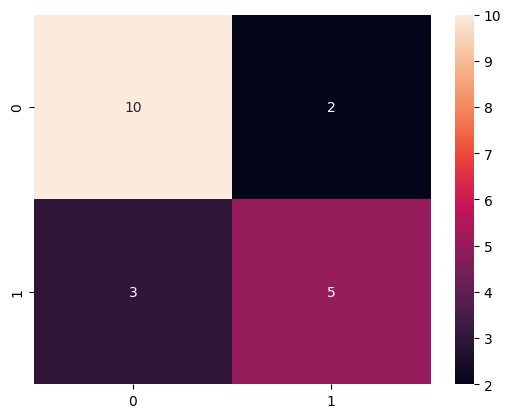

Accuracy: 75.0
Precision: 71.42857142857143
Recall Score 62.5
F1 Score 75.0
ROC AUC Score 72.91666666666667


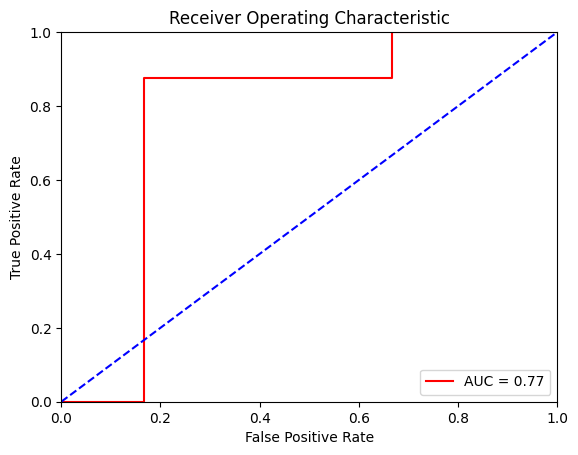

In [176]:
# Performance without hyperparameter tuning
Model = lgb.LGBMClassifier()
BaseModel_Raw='LGB1'
# Splitting the dataframe into train and test, and keeping the splits as it is
xtrain, xtest, ytrain, ytest = Get_Data_Train_Test_Splits(RawDF.copy(deep=True))

# Now training, predicting and evaluating the final model using the best parameters and the oversampled dataset
Model.fit(xtrain, ytrain)
pred = Model.predict(xtest)

#Save Model
Model_Name = f'./Models/UnSMOTE_{BaseModel_Raw}_Unoptimized.pkl'
pkl.dump(Model, open(Model_Name, 'wb'))

# Getting the evaluation metrics/results
# Following metrics are mostly used for classification problems like this one
print('Classification Report\n', classification_report(ytest, pred))
print('Confusion Matrix')
sns.heatmap(confusion_matrix(ytest, pred),annot=True)
plt.show()

print('Accuracy:', accuracy_score(ytest, pred)*100)
print('Precision:', precision_score(ytest, pred)*100)
print('Recall Score', recall_score(ytest, pred)*100)
print('F1 Score', f1_score(ytest, pred,average='micro')*100)
print('ROC AUC Score', roc_auc_score(ytest, pred)*100)

#print the roc curve
probs = Model.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(ytest, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--',color='blue')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Best Model For Smote Dataset

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.71      0.62      0.67         8

    accuracy                           0.75        20
   macro avg       0.74      0.73      0.73        20
weighted avg       0.75      0.75      0.75        20

Confusion Matrix


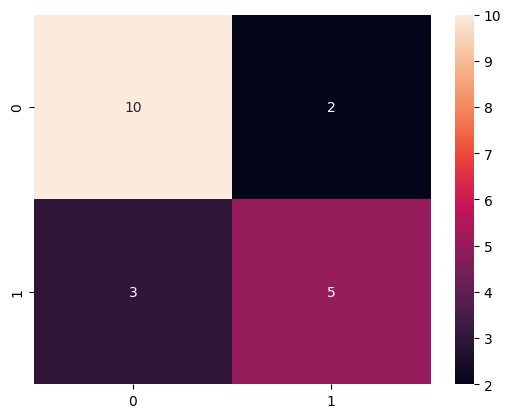

Accuracy: 75.0
Precision: 71.42857142857143
Recall Score 62.5
F1 Score 75.0
ROC AUC Score 72.91666666666667


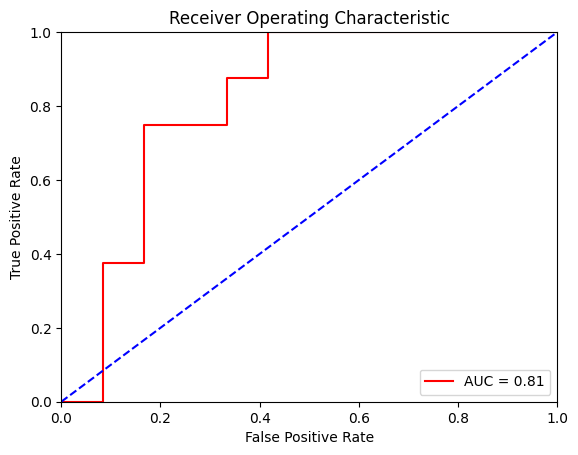

In [177]:
# Performance without hyperparameter 
Model = ExtraTreesClassifier()
BaseModel_Raw='etc1'
# Splitting the dataframe into train and test, and keeping the splits as it is
xtrain, xtest, ytrain, ytest = SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE

# Now training, predicting and evaluating the final model using the best parameters and the oversampled dataset
Model.fit(xtrain, ytrain)
pred = Model.predict(xtest)

#Save Model
Model_Name = f'./Models/SMOTE_{BaseModel_Raw}_Unoptimized.pkl'
pkl.dump(Model, open(Model_Name, 'wb'))

# Getting the evaluation metrics/results
# Following metrics are mostly used for classification problems like this one
print('Classification Report\n', classification_report(ytest, pred))
print('Confusion Matrix')
sns.heatmap(confusion_matrix(ytest, pred),annot=True)
plt.show()

print('Accuracy:', accuracy_score(ytest, pred)*100)
print('Precision:', precision_score(ytest, pred)*100)
print('Recall Score', recall_score(ytest, pred)*100)
print('F1 Score', f1_score(ytest, pred,average='micro')*100)
print('ROC AUC Score', roc_auc_score(ytest, pred)*100)

#print the roc curve
probs = Model.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(ytest, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--',color='blue')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [178]:
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

### Do Cross-Validation

In [179]:
def Cross_Validate_New(Model_dict,X,Y):
    df = pd.DataFrame(columns=['Model','Mode','Cross Validation Folds 1','Cross Validation Folds 2','Cross Validation Folds 3','Cross Validation Folds 4','Cross Validation Folds 5','Mean Value'])
    for modelName,Model in Model_dict.items():
        cv = cross_validate(Model, X, Y, scoring="accuracy",cv=5,return_train_score=True)
        new_row = {'Model':modelName,'Mode':'Train','Cross Validation Folds 1':cv['train_score'][0],'Cross Validation Folds 2':cv['train_score'][1],'Cross Validation Folds 3':cv['train_score'][2],'Cross Validation Folds 4':cv['train_score'][3],'Cross Validation Folds 5':cv['train_score'][4],'Mean Value':cv['train_score'].mean()}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        new_row = {'Model':modelName,'Mode':'Test','Cross Validation Folds 1':cv['test_score'][0],'Cross Validation Folds 2':cv['test_score'][1],'Cross Validation Folds 3':cv['test_score'][2],'Cross Validation Folds 4':cv['test_score'][3],'Cross Validation Folds 5':cv['test_score'][4],'Mean Value':cv['test_score'].mean()}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    df = df.groupby(['Model','Mode']).agg({'Cross Validation Folds 1':'mean','Cross Validation Folds 2':'mean','Cross Validation Folds 3':'mean','Cross Validation Folds 4':'mean','Cross Validation Folds 5':'mean','Mean Value':'mean'})
    return df

### Cross Validation of Raw Dataset

In [180]:
Models_Dict = {
    'LGB': lgb.LGBMClassifier(),
    'SVC': SVC(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
}

X = df.drop('mental_health_issues_personal_declaration',axis=1)
y = df['mental_health_issues_personal_declaration']
DF_Results = Cross_Validate_New(Models_Dict,X,y)
DF_Results

[LightGBM] [Info] Number of positive: 29, number of negative: 75
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 104, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278846 -> initscore=-0.950192
[LightGBM] [Info] Start training from score -0.950192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Cross Validation Folds 1  \
Model                Mode                              
ExtraTreesClassifier Test                       0.77   
                     Train                      1.00   
LGB                  Test                       0.73   
                     Train                      0.99   
SVC                  Test                       0.73   
                     Train                      0.88   

                            Cross Validation Folds 2  \
Model                Mode                              
ExtraTreesClassifier Test                       0.73   
                     Train                      1.00   
LGB                  Test                       0.73   
                     Train                      1.00   
SVC                  Test                       0.73   
                     Train                      0.91   

                            Cross Validation Folds 3  \
Model                Mode                              
ExtraTreesClassifier Test                       0.81   
                     Train                      1.00   
LGB                  Test                       0.69   
                     Train                      1.00   
SVC                  Test                       0.77   
                     Train                      0.91   

                            Cross Validation Folds 4  \
Model                Mode                              
ExtraTreesClassifier Test                       0.69   
                     Train                      1.00   
LGB                  Test                       0.69   
                     Train                      0.98   
SVC                  Test                       0.73   
                     Train                      0.88   

                            Cross Validation Folds 5  Mean Value  
Model                Mode                                         
ExtraTreesClassifier Test                       0.77        0.75  
                     Train                      1.00        1.00  
LGB                  Test                       0.65        0.70  
                     Train                      1.00        0.99  
SVC                  Test                       0.81        0.75  
                     Train                      0.88        0.89

In [181]:
#get top model from DF_results
Estimator_Raw = DF_Results.index[0][0]
print(f'The top performing model from Cross Validation is: {Estimator_Raw}')

The top performing model from Cross Validation is: ExtraTreesClassifier


In [182]:
BaseModel_Raw = None
if Estimator_Raw == 'ExtraTreesClassifier':
    BaseModel_Raw = ExtraTreesClassifier()
elif Estimator_Raw == 'LGB':
    BaseModel_Raw = KNeighborsClassifier()
else:
    BaseModel_Raw = SVC()

### Cross Validation of SMOTE Dataset

In [183]:
SMOTE_DF

cost_of_study  hours_per_week_university_work  alcohol_consumption  \
0             0.50                            0.50                    0   
1             0.50                            0.60                    1   
2             0.50                            0.50                    0   
3             0.50                            0.20                    1   
4             0.18                            0.60                    3   
..             ...                             ...                  ...   
193           0.18                            0.26                    0   
36            0.50                            0.60                    1   
173           0.50                            0.56                    1   
186           0.50                            0.60                    3   
177           0.00                            0.48                    1   

     known_disabilities  year_of_birth  well_hydrated  diet  year_of_study  \
0                     0           0.72              1     2              2   
1                     0           0.94              1     2              2   
2                     0           0.61              0     2              1   
3                     0           0.00              1     2              2   
4                     0           0.50              0     1              1   
..                  ...            ...            ...   ...            ...   
193                   0           0.39              0     1              1   
36                    0           0.83              1     3              0   
173                   1           0.50              0     2              1   
186                   0           0.39              1     3              1   
177                   0           0.39              1     1              1   

     exercise_per_week  quality_of_life  ...  home_country_0_4  \
0                 0.14                3  ...                 1   
1                 0.14                4  ...                 0   
2                 0.14                3  ...                 0   
3                 0.14                3  ...                 0   
4                 0.43                3  ...                 1   
..                 ...              ...  ...               ...   
193               0.29                4  ...                 0   
36                0.00                3  ...                 1   
173               0.14                2  ...                 1   
186               0.14                2  ...                 1   
177               0.14                3  ...                 0   

     course_of_study_0_0  course_of_study_0_1  course_of_study_0_2  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    1                    0   
3                      0                    0                    0   
4                      1                    0                    1   
..                   ...                  ...                  ...   
193                    0                    1                    1   
36                     0                    0                    1   
173                    1                    0                    0   
186                    1                    0                    0   
177                    1                    0                    0   

     course_of_study_0_3  course_of_study_0_4  course_of_study_0_5  \
0                      1                    0                    0   
1                      0                    1                    0   
2                      1                    0                    0   
3                      0                    1                    1   
4                      0                    0                    0   
..                   ...                  ...                  ...   
193                    1                   

In [184]:
SMOTE_DF = SMOTE_DF.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [185]:
Models_Dict = {
    'LGB': lgb.LGBMClassifier(),
    'SVC': SVC(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
}

X = SMOTE_DF.drop('mental_health_issues_personal_declaration',axis=1)
y = SMOTE_DF['mental_health_issues_personal_declaration']
DF_Results = Cross_Validate_New(Models_Dict,X,y)
DF_Results

[LightGBM] [Info] Number of positive: 71, number of negative: 74
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489655 -> initscore=-0.041385
[LightGBM] [Info] Start training from score -0.041385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Info] Number of positive: 72, number of negative: 74
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493151 -> initscore=-0.027399
[LightGBM] [Info] Start training from score -0.027399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

Cross Validation Folds 1  \
Model                Mode                              
ExtraTreesClassifier Test                       0.92   
                     Train                      1.00   
LGB                  Test                       0.78   
                     Train                      1.00   
SVC                  Test                       0.78   
                     Train                      0.90   

                            Cross Validation Folds 2  \
Model                Mode                              
ExtraTreesClassifier Test                       0.84   
                     Train                      1.00   
LGB                  Test                       0.78   
                     Train                      1.00   
SVC                  Test                       0.70   
                     Train                      0.89   

                            Cross Validation Folds 3  \
Model                Mode                              
ExtraTreesClassifier Test                       0.94   
                     Train                      1.00   
LGB                  Test                       0.89   
                     Train                      1.00   
SVC                  Test                       0.86   
                     Train                      0.90   

                            Cross Validation Folds 4  \
Model                Mode                              
ExtraTreesClassifier Test                       0.94   
                     Train                      1.00   
LGB                  Test                       0.92   
                     Train                      1.00   
SVC                  Test                       0.72   
                     Train                      0.90   

                            Cross Validation Folds 5  Mean Value  
Model                Mode                                         
ExtraTreesClassifier Test                       0.86        0.90  
                     Train                      1.00        1.00  
LGB                  Test                       0.86        0.85  
                     Train                      1.00        1.00  
SVC                  Test                       0.78        0.77  
                     Train                      0.94        0.91

In [186]:
#get top model from DF_results
Estimator_SMOTE = DF_Results.index[0][0]
print(f'The top performing model from Cross Validation is: {Estimator_SMOTE}')

The top performing model from Cross Validation is: ExtraTreesClassifier


In [187]:
BaseModel_Raw = None
if Estimator_Raw == 'ExtraTreesClassifier':
    BaseModel_Raw = ExtraTreesClassifier()
elif Estimator_Raw == 'LGB':
    BaseModel_Raw = KNeighborsClassifier()
else:
    BaseModel_Raw = SVC()

### Model Training for Un-SMOTE dataset

Classification Report
               precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.67      0.25      0.36         8

    accuracy                           0.65        20
   macro avg       0.66      0.58      0.56        20
weighted avg       0.65      0.65      0.60        20

Confusion Matrix


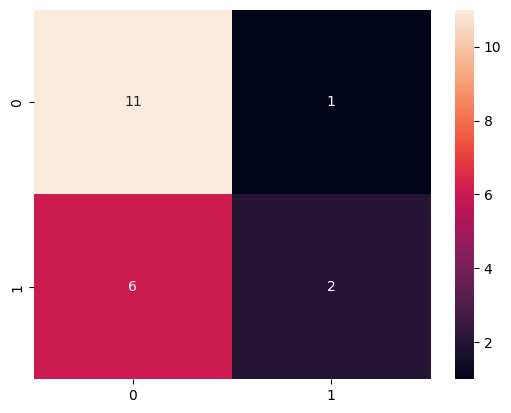

Accuracy: 65.0
Precision: 66.66666666666666
Recall Score 25.0
F1 Score 65.0
ROC AUC Score 58.33333333333333


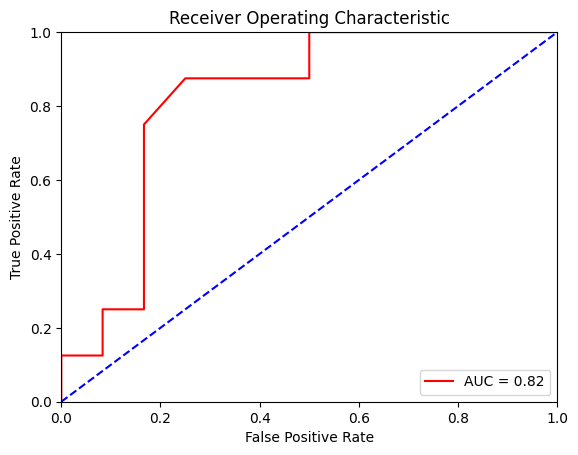

In [108]:
# Performance without hyperparameter tuning
Model = BaseModel_Raw

# Splitting the dataframe into train and test, and keeping the splits as it is
xtrain, xtest, ytrain, ytest = Get_Data_Train_Test_Splits(RawDF.copy(deep=True))

# Now training, predicting and evaluating the final model using the best parameters and the oversampled dataset
Model.fit(xtrain, ytrain)
pred = Model.predict(xtest)

#Save Model
Model_Name = f'./Models/UnSMOTE_{BaseModel_Raw}_Unoptimized.pkl'
pkl.dump(Model, open(Model_Name, 'wb'))

# Getting the evaluation metrics/results
# Following metrics are mostly used for classification problems like this one
print('Classification Report\n', classification_report(ytest, pred))
print('Confusion Matrix')
sns.heatmap(confusion_matrix(ytest, pred),annot=True)
plt.show()

print('Accuracy:', accuracy_score(ytest, pred)*100)
print('Precision:', precision_score(ytest, pred)*100)
print('Recall Score', recall_score(ytest, pred)*100)
print('F1 Score', f1_score(ytest, pred,average='micro')*100)
print('ROC AUC Score', roc_auc_score(ytest, pred)*100)

#print the roc curve
probs = Model.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(ytest, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--',color='blue')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [109]:
RawDF

cost_of_study  hours_per_week_university_work  alcohol_consumption  \
0             0.50                            0.64                    1   
1             0.50                            0.20                    0   
2             0.50                            0.50                    0   
3             0.50                            0.50                    1   
4             0.50                            0.22                    0   
..             ...                             ...                  ...   
218           0.50                            0.62                    0   
219           0.18                            0.60                    3   
220           0.01                            0.42                    1   
221           0.18                            0.70                    0   
222           0.08                            0.00                    0   

     known_disabilities  year_of_birth  well_hydrated  diet  year_of_study  \
0                     0           0.56              1     2              1   
1                     1           0.89              1     2              2   
2                     0           0.50              1     1              2   
3                     0           0.44              1     1              1   
4                     0           1.00              0     2              2   
..                  ...            ...            ...   ...            ...   
218                   1           1.00              1     1              2   
219                   0           0.50              0     1              1   
220                   0           1.00              1     2              1   
221                   1           1.00              1     1              2   
222                   1           0.78              1     3              2   

     exercise_per_week  quality_of_life  ...  home_country_0_3  \
0                 0.29                3  ...                 0   
1                 0.14                3  ...                 1   
2                 0.14                3  ...                 1   
3                 0.14                4  ...                 0   
4                 0.00                3  ...                 1   
..                 ...              ...  ...               ...   
218               0.86                3  ...                 0   
219               0.43                3  ...                 1   
220               0.00                3  ...                 1   
221               0.71                3  ...                 0   
222               0.14                2  ...                 0   

     home_country_0_4  course_of_study_0_0  course_of_study_0_1  \
0                   1                    0                    0   
1                   0                    0                    0   
2                   1                    0                    0   
3                   1                    0                    0   
4                   0                    0                    0   
..                ...                  ...                  ...   
218                 0                    1                    0   
219                 1                    1                    0   
220                 0                    1                    0   
221                 0                    1                    0   
222                 0                    1                    0   

     course_of_study_0_2  course_of_study_0_3  course_of_study_0_4  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    0                    0   
4                      0                    0                    0   
..                   ...                  ...                  ...   
218                    1                    0                    0   
219      

In [ ]:
# Performing Hyperparameter tuning using RandomizedSearchCV
Model = BaseModel_Raw

Params = {}
if Estimator_Raw == 'Bernoulli Naive Bayes':
    Params = {
        'alpha': [0.0001,0.001,0.01],
        'binarize': [0,1],
        'fit_prior': [True,False],
    }
elif Estimator_Raw == 'KNeighbors':
    Params = {
        'n_neighbors': [3,5,7,9],
        'weights': ['uniform','distance'],
    }
else:
    Params = {
        'C': [0.1,1,10,100],
        'gamma': [1,0.1,0.01,0.001],
        'kernel': ['rbf','poly','sigmoid'],
    }


# Splitting the dataframe into train and test, and keeping the splits as it is
xtrain, xtest, ytrain, ytest = Get_Data_Train_Test_Splits(RawDF.copy(deep=True))

# Best_Params = RandomizedSearchCV(Model, verbose=1, param_distributions=Params_BernoulliNB, cv=5, scoring='accuracy', n_iter=3).fit(Train_X, Train_Y).best_params_
# print('The best parameters are:\n',Best_Params)

Best_Params = GridSearchCV(Model, verbose=1, param_grid=Params, cv=5, scoring='accuracy').fit(xtrain, ytrain).best_params_
print('The best parameters are:\n',Best_Params)

# Splitting the dataframe into train and test, and keeping the splits as it is
xtrain, xtest, ytrain, ytest = Get_Data_Train_Test_Splits(RawDF.copy(deep=True))

# Now training, predicting and evaluating the final model using the best parameters and the oversampled dataset
Model = BaseModel_Raw.set_params(**Best_Params) # Model with the optimized parameters
Model.fit(xtrain,ytrain)
pred = Model.predict(xtest)

#Save Model
Model_Name = f'./Models/UnSMOTE_{BaseModel_Raw}_Optimized.pkl'
pkl.dump(Model, open(Model_Name, 'wb'))

# Getting the evaluation metrics/results
# Following metrics are mostly used for classification problems like this one
print('Classification Report\n', classification_report(ytest, pred))
print('Confusion Matrix')
sns.heatmap(confusion_matrix(ytest, pred),annot=True)
plt.show()

print('Accuracy:', accuracy_score(ytest, pred)*100)
print('Precision:', precision_score(ytest, pred)*100)
print('Recall Score', recall_score(ytest, pred)*100)
print('F1 Score', f1_score(ytest, pred,average='micro')*100)
print('ROC AUC Score', roc_auc_score(ytest, pred)*100)

#print the roc curve
probs = Model.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(ytest, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--',color='blue')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Model Training for SMOTE dataset

In [ ]:
# Performance without hyperparameter tuning
Model = BaseModel_SMOTE

# Splitting the dataframe into train and test, and keeping the splits as it is
SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE = OverSample_DF(df)

# Now training, predicting and evaluating the final model using the best parameters and the oversampled dataset
Model.fit(SMOTE_Train_X, SMOTE_Train_Y)
pred = Model.predict(Test_X_Not_SMOTE)

#Save Model
Model_Name = f'./Models/SMOTE_{BaseModel_SMOTE}_Unoptimized.pkl'
pkl.dump(Model, open(Model_Name, 'wb'))

# Getting the evaluation metrics/results
# Following metrics are mostly used for classification problems like this one
print('Classification Report\n', classification_report(Test_Y_Not_SMOTE, pred))
print('Confusion Matrix')
sns.heatmap(confusion_matrix(Test_Y_Not_SMOTE, pred),annot=True)
plt.show()

print('Accuracy:', accuracy_score(Test_Y_Not_SMOTE, pred)*100)
print('Precision:', precision_score(Test_Y_Not_SMOTE, pred)*100)
print('Recall Score', recall_score(Test_Y_Not_SMOTE, pred)*100)
print('F1 Score', f1_score(Test_Y_Not_SMOTE, pred,average='micro')*100)
print('ROC AUC Score', roc_auc_score(Test_Y_Not_SMOTE, pred)*100)

#print the roc curve
probs = Model.predict_proba(Test_X_Not_SMOTE)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Test_Y_Not_SMOTE, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--',color='blue')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Performing Hyperparameter tuning using RandomizedSearchCV
Model = BaseModel_SMOTE

Params = {}
if Estimator_SMOTE == 'Bernoulli Naive Bayes':
    Params = {
        'alpha': [0.0001,0.001,0.01],
        'binarize': [0,1],
        'fit_prior': [True,False],
    }
elif Estimator_SMOTE == 'KNeighbors':
    Params = {
        'n_neighbors': [3,5,7,9],
        'weights': ['uniform','distance'],
    }
else:
    Params = {
        'C': [0.1,1,10,100],
        'gamma': [1,0.1,0.01,0.001],
        'kernel': ['rbf','poly','sigmoid'],
    }

# Splitting the dataframe into train and test, and keeping the splits as it is
SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE = OverSample_DF(df)

# Best_Params = RandomizedSearchCV(Model, verbose=1, param_distributions=Params_BernoulliNB, cv=5, scoring='accuracy', n_iter=3).fit(Train_X, Train_Y).best_params_
# print('The best parameters are:\n',Best_Params)

Best_Params = GridSearchCV(Model, verbose=1, param_grid=Params, cv=5, scoring='accuracy').fit(SMOTE_Train_X, SMOTE_Train_Y).best_params_
print('The best parameters are:\n',Best_Params)

# Splitting the dataframe into train and test, and keeping the splits as it is
SMOTE_Train_X, Test_X_Not_SMOTE, SMOTE_Train_Y, Test_Y_Not_SMOTE = OverSample_DF(df)

# Now training, predicting and evaluating the final model using the best parameters and the oversampled dataset
Model = BaseModel_SMOTE.set_params(**Best_Params) # Model with the optimized parameters
Model.fit(SMOTE_Train_X,SMOTE_Train_Y)
pred = Model.predict(Test_X_Not_SMOTE)

#Save Model
Model_Name = f'./Models/SMOTE_{BaseModel_SMOTE}_Optimized.pkl'
pkl.dump(Model, open(Model_Name, 'wb'))

# Getting the evaluation metrics/results
# Following metrics are mostly used for classification problems like this one
print('Classification Report\n', classification_report(Test_Y_Not_SMOTE, pred))
print('Confusion Matrix')
sns.heatmap(confusion_matrix(Test_Y_Not_SMOTE, pred),annot=True)
plt.show()

print('Accuracy:', accuracy_score(Test_Y_Not_SMOTE, pred)*100)
print('Precision:', precision_score(Test_Y_Not_SMOTE, pred)*100)
print('Recall Score', recall_score(Test_Y_Not_SMOTE, pred)*100)
print('F1 Score', f1_score(Test_Y_Not_SMOTE, pred,average='micro')*100)
print('ROC AUC Score', roc_auc_score(Test_Y_Not_SMOTE, pred)*100)

#print the roc curve
probs = Model.predict_proba(Test_X_Not_SMOTE)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Test_Y_Not_SMOTE, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--',color='blue')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()